#2.Esfuerzos de Corte Puro y Torsion

##2.1. Estuerzos de Corte Puro y Aplastamiento en pernos.
Como un ejemplo de la acción de los esfuerzos cortantes, consideremos la conexión con perno que se muestra en la figura 2.1. Esta conexión consiste en una barra plana $A$, dos barras planas $C$ y un perno $B$ que pasa a través de agujeros. Debido a las cargas de tensión $P$, la barra y la horquilla ejercerán presión contra el perno en compresión, lo que dará lugar a esfuerzos de contacto conocidos como **esfuerzos de aplastamiento**. Además, la resultante de estos esfuerzos tienen la tendencia a cortar o deslizarse a través del perno, es decir, atravesarlo, y esta tendencia es resistida por los **esfuerzos cortantes en el perno**, que son aquellos que actúa de manera tangencial a la superficie del material.

####Figura 2.1. Conexion con perno sometido a cortante doble.
$$(a)$$
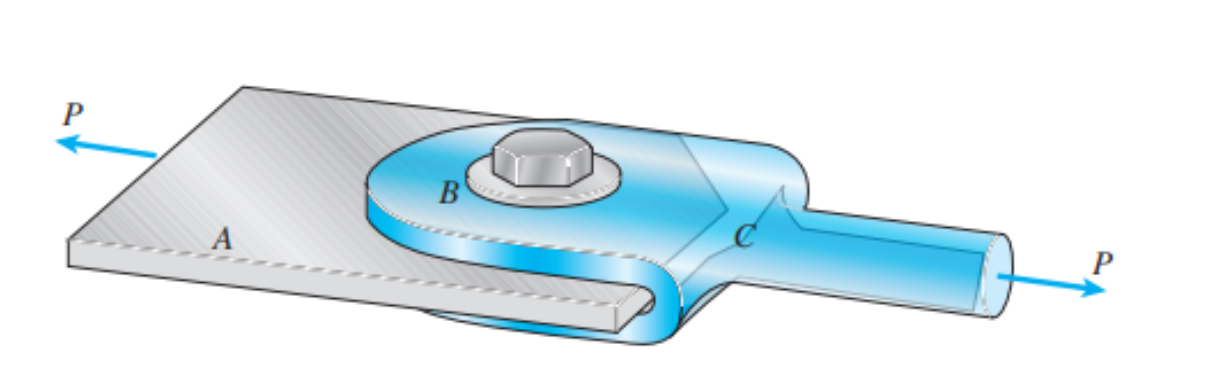

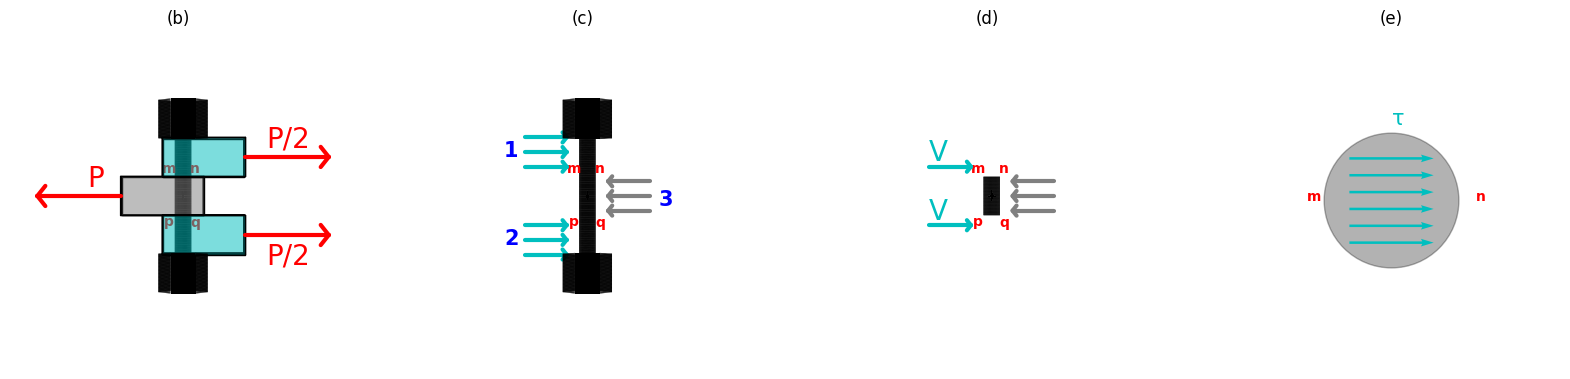

In [1]:
#@title Figura 2.1. Conexion con Perno sometido a cortante doble.
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 10))
##Definir la disposición de subgráficos utilizando GridSpec
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1,1,1])

ax1 = fig.add_subplot(gs[0], projection='3d')

# Define las coordenadas de los vértices del prisma rectangular A
vertices1 = [
    [0, 0, 0], [2, 0, 0], [2, 1, 0], [0, 1, 0],  # Base inferior
    [0, 0, 0.2], [2, 0, 0.2], [2, 1, 0.2], [0, 1, 0.2]   # Base superior
]

# Definir las caras del prisma rectangular A
caras1 = [
    [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],  # Cara frontal
    [vertices1[1], vertices1[2], vertices1[6], vertices1[5]],  # Lado derecho
    [vertices1[2], vertices1[3], vertices1[7], vertices1[6]],  # Cara trasera
    [vertices1[3], vertices1[0], vertices1[4], vertices1[7]],  # Lado izquierdo
    [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],  # Parte superior
    [vertices1[0], vertices1[1], vertices1[2], vertices1[3]]   # Parte inferior
]

# Dibujar caras del prisma A
prisma = Poly3DCollection(caras1, alpha=0.3, facecolors='grey', edgecolors='black')
ax1.add_collection3d(prisma)

#traslacion del prisma A para generar los prismas C
traslacion1 = np.array([1, 0, 0.2])
traslacion2 = np.array([1, 0, -0.2])

vertices2 = np.array(vertices1) + traslacion1
vertices3 = np.array(vertices1) + traslacion2

caras2 = [
    [vertices2[0], vertices2[1], vertices2[5], vertices2[4]],  # Cara frontal
    [vertices2[1], vertices2[2], vertices2[6], vertices2[5]],  # Lado derecho
    [vertices2[2], vertices2[3], vertices2[7], vertices2[6]],  # Cara trasera
    [vertices2[3], vertices2[0], vertices2[4], vertices2[7]],  # Lado izquierdo
    [vertices2[4], vertices2[5], vertices2[6], vertices2[7]],  # Parte superior
    [vertices2[0], vertices2[1], vertices2[2], vertices2[3]]   # Parte inferior
]

caras3 = [
    [vertices3[0], vertices3[1], vertices3[5], vertices3[4]],  # Cara frontal
    [vertices3[1], vertices3[2], vertices3[6], vertices3[5]],  # Lado derecho
    [vertices3[2], vertices3[3], vertices3[7], vertices3[6]],  # Cara trasera
    [vertices3[3], vertices3[0], vertices3[4], vertices3[7]],  # Lado izquierdo
    [vertices3[4], vertices3[5], vertices3[6], vertices3[7]],  # Parte superior
    [vertices3[0], vertices3[1], vertices3[2], vertices3[3]]   # Parte inferior
]

prisma_trasladado1 = Poly3DCollection(caras2, alpha=0.3, facecolors='c', edgecolors='black')
ax1.add_collection3d(prisma_trasladado1)

prisma_trasladado2 = Poly3DCollection(caras3, alpha=0.3, facecolors='c', edgecolors='black')
ax1.add_collection3d(prisma_trasladado2)

#se dibuja el perno
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z1 = np.linspace(-0.2, 0.4, resolucion)
theta, z1 = np.meshgrid(theta, z1)
x1 = 1.5+r * np.cos(theta)
y1 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x1, y1, z1, color='black', alpha=1)

#Graficar cabezas del tornillo
r = 0.6  # Radio del cilindro
resolucion = 7  # Resolución para la superficie del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z2 = np.linspace(0.4, 0.6, 100)
theta, z2 = np.meshgrid(theta, z2)
x2 = 1.5+r * np.cos(theta)
y2 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x2, y2, z2, color='black', alpha=1)

r = 0.6  # Radio del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z3 = np.linspace(-0.2, -0.4, 100)
theta, z3 = np.meshgrid(theta, z3)
x3 = 1.5+r * np.cos(theta)
y3 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x3, y3, z3, color='black', alpha=1)

# Graficamos las fuerzas
fuerza1_inicio = [0, 0, 0.1]
fuerza1_direccion = [-1, 0, 0]
longitud1 = 2

fuerza2_inicio = [3, 0, 0.3]
fuerza2_direccion = [1, 0, 0]
longitud2 = 2

fuerza3_inicio = [3, 0, -0.1]
fuerza3_direccion = [1, 0, 0]
longitud3 = 2

ax1.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
ax1.quiver(*fuerza2_inicio, *fuerza2_direccion, length=longitud2, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
ax1.quiver(*fuerza3_inicio, *fuerza3_direccion, length=longitud3, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')

#textos
ax1.text(-0.8,0,0.15,'P',fontsize= 20, color = 'red')
ax1.text(3.5,0,0.35,'P/2',fontsize= 20, color ='red')
ax1.text(3.5,0,-0.25,'P/2',fontsize= 20, color ='red')
ax1.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax1.text(0.65+0.4,0,-0.05,'p',fontsize= 10, color ='red',fontweight='bold')
ax1.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')
ax1.text(0.65+1.02,-2,-0.05,'q',fontsize= 10, color ='red',fontweight='bold')

#vista del grafico
ax1.set_xlim([-1, 4])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-0.3, 0.5])
ax1.view_init(elev=0, azim=-90)
ax1.axis('off')
ax1.set_title('(b)')


ax2 = fig.add_subplot(gs[1], projection='3d')

# Graficar el cilindro
ax2.plot_surface(x1, y1, z1, color='black', alpha=1)
ax2.plot_surface(x2, y2, z2, color='black', alpha=1)
ax2.plot_surface(x3, y3, z3, color='black', alpha=1)
ax2.view_init(elev=0, azim=-90)
ax2.set_xlim([-1, 4])
ax2.set_ylim([-2, 2])
ax2.set_zlim([-0.3, 0.5])
ax2.set_title('(c)')
ax2.axis('off')

#graficar las fuerzas
for i in np.linspace(-0.2,0.4,9):
  if i>=0 and i <=0.2:
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax2.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  else:
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax2.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
#textos 123
ax2.text(-0.5,0,0.3,'1',fontsize= 15, color ='blue',fontweight='bold')
ax2.text(-0.5,0,-0.15,'2',fontsize= 15, color ='blue',fontweight='bold')
ax2.text(3.2,0,0.05,'3',fontsize= 15, color ='blue',fontweight='bold')

#textos mnpq
ax2.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+0.4,0,-0.05,'p',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+1.02,-2,-0.05,'q',fontsize= 10, color ='red',fontweight='bold')

ax3 = fig.add_subplot(gs[2], projection='3d')
# Graficar el cilindro
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z4 = np.linspace(0, 0.2, resolucion)
theta, z4 = np.meshgrid(theta, z4)
x4 = 1.5+r * np.cos(theta)
y4 = 0.5+r * np.sin(theta)

#graficar el segmento de tornillo
ax3.plot_surface(x4, y4, z4, color='black', alpha=1)
ax3.view_init(elev=0, azim=-90)
ax3.set_xlim([-1, 4])
ax3.set_ylim([-2, 2])
ax3.set_zlim([-0.3, 0.5])
ax3.set_title('(d)')
ax3.axis('off')

for i in np.linspace(-0.2,0.4,9):
  if i>=0 and i <=0.2:
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax3.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif (i>= -0.1 and i<=0) or (i>=0.2 and i <=0.3):
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax3.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
    texto_inicio = [0, 0, i+0.03]
    ax3.text(*texto_inicio,"V",fontsize= 20, color ='c')

#textos mnpq
ax3.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+0.4,0,-0.05,'p',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+1.02,-2,-0.05,'q',fontsize= 10, color ='red',fontweight='bold')

ax4 = plt.subplot(gs[3])
circle = plt.Circle((0, 0), 0.4, color='black', alpha=0.3)

# Agregar el círculo al cuarto subgráfico (ax4)
ax4.add_patch(circle)
ax4.set_aspect('equal')
ax4.set_ylim([-1, 1])
ax4.set_xlim([-1, 1])

#grafico de esfuerzos cortantes en el circulo
for i in np.linspace(-0.25,0.25,6):
  ax4.quiver(-0.25, i, 0.5, 0, angles='xy', scale_units='xy', scale=1, color='c')

#textos mn
ax4.text(-0.5,0,'m', fontsize= 10, color ='red',fontweight='bold')
ax4.text(0.5,0,'n', fontsize= 10, color ='red',fontweight='bold')
ax4.text(0,0.45,'\u03C4', fontsize= 15, color ='c')

ax4.axis('off')
ax4.set_title('(e)')
plt.show()

Para comprender con mayor claridad las acciones de los esfuerzos de soporte y cortante, analicemos este tipo de conexión en una vista lateral esquemática (figura 2.1b). Con esta representación en mente, podemos dibujar un diagrama de cuerpo libre del perno (figura 2.1c). Los esfuerzos en los apoyos ejercidos por la horquilla contra el perno se muestran en el lado izquierdo del diagrama de cuerpo libre y se identifican como $1$ y $3$. Los esfuerzos de la barra aparecen en el lado derecho y se identifican como $2$. La distribución real de los esfuerzos de soporte es difícil de determinar, por lo que es común suponer que están distribuidos uniformemente. Con base a esta suposición, el esfuerzo de aplastamiento (b) puede calcularse siguiendo la siguiente fórmula:

$$ \sigma_b={\frac{F_b}{A_b}} \quad (2.1)  $$

Donde:
- $A_b$ es el área del soporte, que se define como el área proyectada de la superficie curva del soporte. Por ejemplo, consideremos los esfuerzos de soporte identificados como $1$. El área proyectada sobre la cual actúan es un rectángulo que tiene una altura igual al espesor de la horquilla y un ancho igual al diámetro del perno.
- Fb es la fuerza de soporte, tomando también el caso $1$ como ejemplo, su valor es igual a $P/2$.

Para el caso $3$ se tienen la misma fuerza y área que el caso $1$ explicado anteriormente. Ahora, consideremos los esfuerzos de soporte entre la barra plana y el perno (los esfuerzos identificados como $2$). Para estos esfuerzos, el área de soporte $A_b$ es un rectángulo con una altura igual al espesor de la barra plana y un ancho igual al diámetro del perno. La fuerza de soporte correspondiente $F_b$ es igual a la carga $P$. El diagrama de cuerpo libre de la figura 2.1c muestra una tendencia a cortar el perno a lo largo de las secciones transversales $mn$ y $pq$. Al analizar un diagrama de cuerpo libre de la parte mnpq del perno (consulte la figura 2.1d), podemos observar que las fuerzas cortantes $V$ actúan sobre las superficies cortadas del perno. En el caso mostrado, la cortante $V$ tiene un valor de $P/2$.

El diagrama de cuerpo libre de la figura 1.24c muestra una tendencia a cortar el perno a lo largo de las secciones transversales $mn$ y $pq$. Al analizar un diagrama de cuerpo libre de la parte $mnpq$ del perno (consulte la figura 2.1d), podemos observar que las fuerzas cortantes $V$ actúan sobre las superficies cortadas del perno. La distribución exacta de los esfuerzos no se conoce, pero son máximos cerca del centro y se vuelven cero en ciertas ubicaciones en los bordes. El esfuerzo cortante promedio sobre la sección transversal de un perno se obtiene dividiendo la fuerza cortante total $V$ entre el área $A$ de la sección transversal sobre la que actúa, como sigue:

$$ \tau_{prom}={\frac{F_b}{A_b}} \quad (2.2)  $$


Para que la aplicación de esta fórmula sea válida, se deben cumplir las siguientes condiciones:
- La carga debe ser centrada, momento flector despreciable.
- La carga debe ser estática.
- Pieza de un mismo material.
- Material homogéneo.
- La pieza no debe tener tensiones iniciales


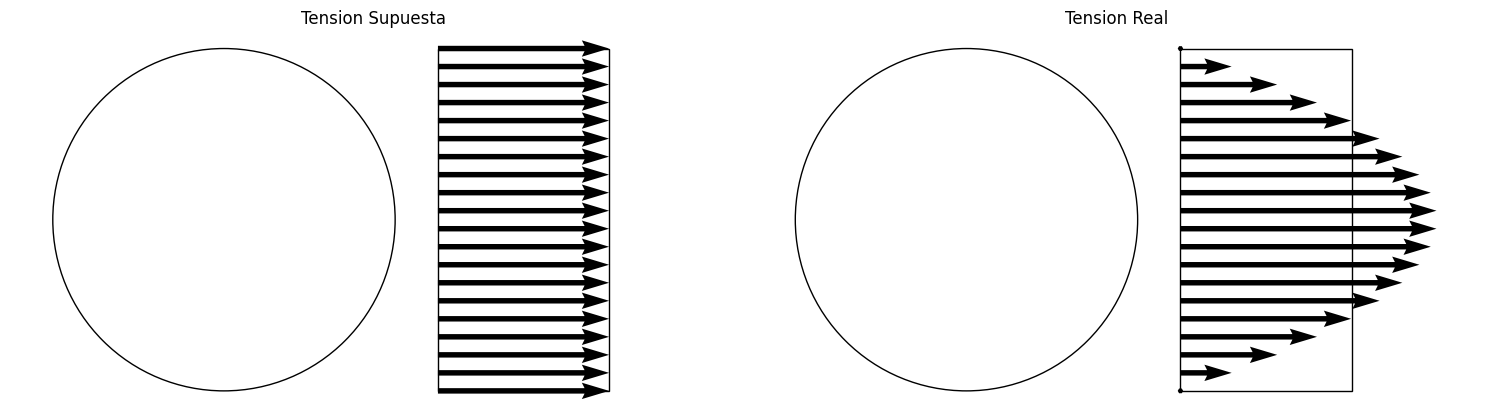

In [ ]:
#@title Figura 2.2. Tensiones cortantes reales y supuestas

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# Crear figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Configuración del borde y sin relleno
kwargs = {'fill': False, 'edgecolor': 'black'}

# Dibujar un círculo y un rectángulo en cada subplot
circle = Circle((0.5, 0.5), 0.4, **kwargs)
rectangle = Rectangle((1, 0.1), 0.4, 0.8, **kwargs)
ax1.set_xlim(0, 1.7)
ax1.add_patch(circle)
ax1.add_patch(rectangle)
ax1.set_aspect('equal')
ax1.set_title('Tension Supuesta')
ax1.axis('off')

for i in np.linspace(0.1,0.9,20):
  ax1.quiver(1, i, 0.4, 0, angles='xy', scale_units='xy', scale=1, color='black')

# Dibujar un círculo y un rectángulo en cada subplot
circle = Circle((0.5, 0.5), 0.4, **kwargs)
rectangle = Rectangle((1, 0.1), 0.4, 0.8, **kwargs)
ax2.set_xlim(0, 1.7)
ax2.add_patch(circle)
ax2.add_patch(rectangle)
ax2.set_aspect('equal')
ax2.set_title('Tension Real')
ax2.axis('off')

for i in np.linspace(0.1,0.9,20):
  ax2.quiver(1, i,-3.75*(i-0.5)**2+0.6, 0, angles='xy', scale_units='xy', scale=1, color='black')

plt.tight_layout()
plt.show()




En la figura 2.1 el perno está sometido a una **cortante doble**, en la siguiente figura se ilustra un perno sometido a una **cortante simple** y las deducciones del esfuerzo cortante promedio y esfuerzos de aplastamiento son idénticas a lo desarrollado anteriormente.
####Figura 2.3. Conexion con perno sometido a cortante simple

$$(a)$$

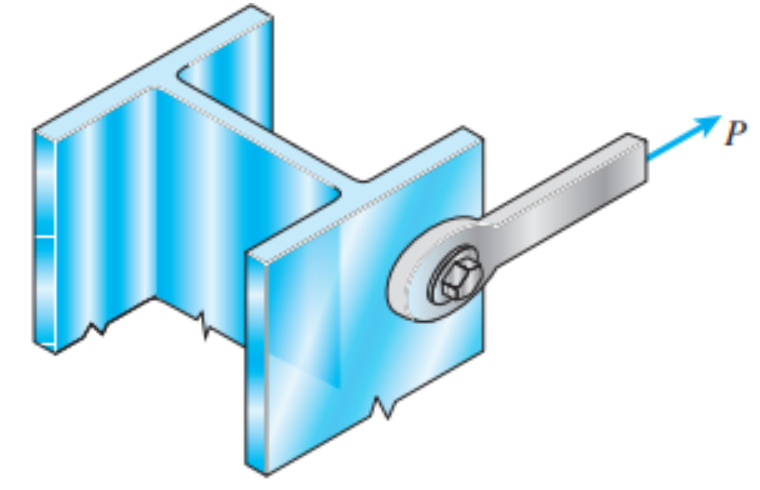

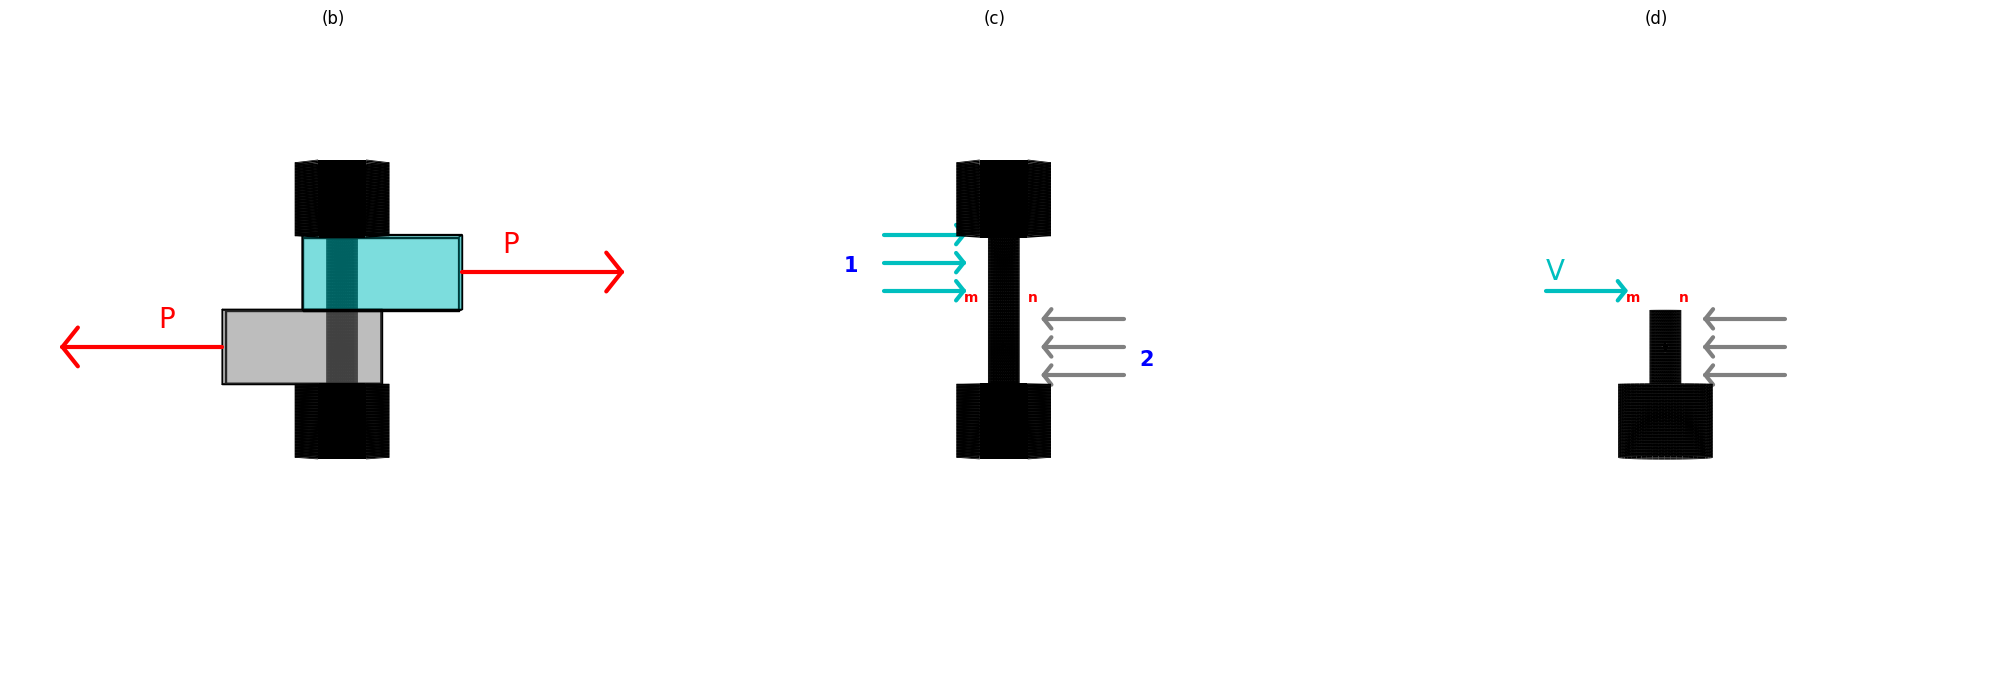

In [ ]:
#@title Figura 2.3. Conexion con perno sometido a cortante simple
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 10))
##Definir la disposición de subgráficos utilizando GridSpec
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1,1])

ax1 = fig.add_subplot(gs[0], projection='3d')

# Define las coordenadas de los vértices del prisma rectangular A
vertices1 = [
    [0, 0, 0], [2, 0, 0], [2, 1, 0], [0, 1, 0],  # Base inferior
    [0, 0, 0.2], [2, 0, 0.2], [2, 1, 0.2], [0, 1, 0.2]   # Base superior
]

# Definir las caras del prisma rectangular A
caras1 = [
    [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],  # Cara frontal
    [vertices1[1], vertices1[2], vertices1[6], vertices1[5]],  # Lado derecho
    [vertices1[2], vertices1[3], vertices1[7], vertices1[6]],  # Cara trasera
    [vertices1[3], vertices1[0], vertices1[4], vertices1[7]],  # Lado izquierdo
    [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],  # Parte superior
    [vertices1[0], vertices1[1], vertices1[2], vertices1[3]]   # Parte inferior
]

# Dibujar caras del prisma A
prisma = Poly3DCollection(caras1, alpha=0.3, facecolors='grey', edgecolors='black')
ax1.add_collection3d(prisma)

#traslacion del prisma A para generar los prismas C
traslacion1 = np.array([1, 0, 0.2])
traslacion2 = np.array([1, 0, -0.2])

vertices2 = np.array(vertices1) + traslacion1

caras2 = [
    [vertices2[0], vertices2[1], vertices2[5], vertices2[4]],  # Cara frontal
    [vertices2[1], vertices2[2], vertices2[6], vertices2[5]],  # Lado derecho
    [vertices2[2], vertices2[3], vertices2[7], vertices2[6]],  # Cara trasera
    [vertices2[3], vertices2[0], vertices2[4], vertices2[7]],  # Lado izquierdo
    [vertices2[4], vertices2[5], vertices2[6], vertices2[7]],  # Parte superior
    [vertices2[0], vertices2[1], vertices2[2], vertices2[3]]   # Parte inferior
]

prisma_trasladado1 = Poly3DCollection(caras2, alpha=0.3, facecolors='c', edgecolors='black')
ax1.add_collection3d(prisma_trasladado1)

#se dibuja el perno
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z1 = np.linspace(0, 0.4, resolucion)
theta, z1 = np.meshgrid(theta, z1)
x1 = 1.5+r * np.cos(theta)
y1 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x1, y1, z1, color='black', alpha=1)

#Graficar cabezas del tornillo
r = 0.6  # Radio del cilindro
resolucion = 7  # Resolución para la superficie del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z2 = np.linspace(0.4, 0.6, 100)
theta, z2 = np.meshgrid(theta, z2)
x2 = 1.5+r * np.cos(theta)
y2 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x2, y2, z2, color='black', alpha=1)

r = 0.6  # Radio del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z3 = np.linspace(0, -0.2, 100)
theta, z3 = np.meshgrid(theta, z3)
x3 = 1.5+r * np.cos(theta)
y3 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x3, y3, z3, color='black', alpha=1)

# Graficamos las fuerzas
fuerza1_inicio = [0, 0, 0.1]
fuerza1_direccion = [-1, 0, 0]
longitud1 = 2

fuerza2_inicio = [3, 0, 0.3]
fuerza2_direccion = [1, 0, 0]
longitud2 = 2

ax1.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
ax1.quiver(*fuerza2_inicio, *fuerza2_direccion, length=longitud2, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')

#textos
ax1.text(-0.8,0,0.15,'P',fontsize= 20, color = 'red')
ax1.text(3.5,0,0.35,'P',fontsize= 20, color ='red')

#vista del grafico
ax1.set_xlim([-1, 4])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-0.3, 0.5])
ax1.view_init(elev=0, azim=-90)
ax1.axis('off')
ax1.set_title('(b)')

ax2 = fig.add_subplot(gs[1], projection='3d')

# Graficar el cilindro
ax2.plot_surface(x1, y1, z1, color='black', alpha=1)
ax2.plot_surface(x2, y2, z2, color='black', alpha=1)
ax2.plot_surface(x3, y3, z3, color='black', alpha=1)
ax2.view_init(elev=0, azim=-90)
ax2.set_xlim([-1, 4])
ax2.set_ylim([-2, 2])
ax2.set_zlim([-0.3, 0.5])
ax2.set_title('(c)')
ax2.axis('off')

#graficar las fuerzas
for i in np.linspace(-0.2,0.4,9):
  if i>=0 and i <=0.2:
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax2.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif i>=0:
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax2.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
#textos 123
ax2.text(-0.5,0,0.3,'1',fontsize= 15, color ='blue',fontweight='bold')
ax2.text(3.2,0,0.05,'2',fontsize= 15, color ='blue',fontweight='bold')

#textos mnpq
ax2.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+1.15,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')

ax3 = fig.add_subplot(gs[2], projection='3d')
# Graficar el cilindro
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z4 = np.linspace(0, 0.2, resolucion)
theta, z4 = np.meshgrid(theta, z4)
x4 = 1.5+r * np.cos(theta)
y4 = 0.5+r * np.sin(theta)

#graficar el segmento de tornillo
ax3.plot_surface(x4, y4, z4, color='black', alpha=1)
ax3.view_init(elev=0, azim=-90)
ax3.set_xlim([-1, 4])
ax3.set_ylim([-2, 2])
ax3.set_zlim([-0.3, 0.5])
ax3.set_title('(d)')
ax3.axis('off')

for i in np.linspace(-0.2,0.4,9):
  if i>=0 and i <=0.2:
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax3.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif (i>=0.2 and i <=0.3):
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax3.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
    texto_inicio = [0, 0, i+0.03]
    ax3.text(*texto_inicio,"V",fontsize= 20, color ='c')

#textos mnpq
ax3.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')

r = 0.6  # Radio del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z3 = np.linspace(0, -0.2, 100)
theta, z3 = np.meshgrid(theta, z3)
x3 = 1.5+r * np.cos(theta)
y3 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax3.plot_surface(x3, y3, z3, color='black', alpha=1)

plt.tight_layout()
plt.show()

De esta manera, se puede concluir que los esfuerzos cortantes promedio de un perno sometido a cortante doble y a cortante simple, respectivamente, según las figuras 2.1 y 2.3 son:

$$ \tau_{prom}={\frac{P}{2A}} \quad  \tau_{prom}={\frac{P}{A}}\quad (2.3,2.4)  $$

##2.2. Teorema de reciprocidad o Teorema de Cauchy
Para obtener una representación más completa de la acción de los esfuerzos cortantes, consideremos un elemento pequeño de material en forma de un paralelepípedo rectangular con longitudes de sus lados a, b y c en las direcciones x, y y z, respectivamente.

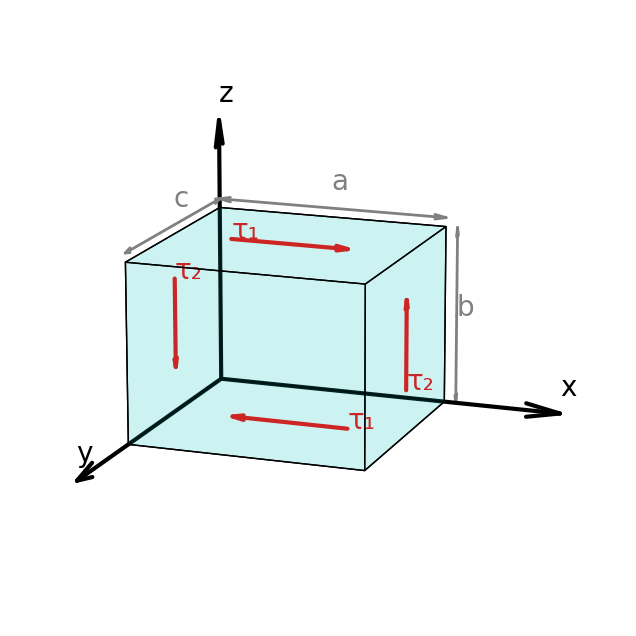

In [ ]:
#@title Figura 2.4. Elemento pequeño de material sometido a esfuerzos cortantes

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Define las coordenadas de los vértices del prisma rectangular
vertices = [
    [0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0],  # Base inferior
    [0, 0, 2], [2, 0, 2], [2, 2, 2], [0, 2, 2]   # Base superior
]

# Definir las caras del prisma rectangular
caras = [
    [vertices[0], vertices[1], vertices[5], vertices[4]],  # Cara frontal
    [vertices[1], vertices[2], vertices[6], vertices[5]],  # Lado derecho
    [vertices[2], vertices[3], vertices[7], vertices[6]],  # Cara trasera
    [vertices[3], vertices[0], vertices[4], vertices[7]],  # Lado izquierdo
    [vertices[4], vertices[5], vertices[6], vertices[7]],  # Parte superior
    [vertices[0], vertices[1], vertices[2], vertices[3]]   # Parte inferior
]

# Dibujar caras del prisma
prisma = Poly3DCollection(caras, alpha=0.1, facecolors='c', edgecolors='black')
ax.add_collection3d(prisma)

# dibujar los ejes
inicio= [0,0,0]
ejes =[[3,0,0],[0,3,0],[0,0,3]]
for i in ejes:
  ax.quiver(*inicio, *i, color='black', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  if ejes.index(i) ==0:
    a='y'
  elif ejes.index(i) ==1:
    a='x'
  elif ejes.index(i) ==2:
    a='z'
  ax.text(i[0],i[1],i[2]+0.2, a ,fontsize= 20, color ='black')
#dibujar los esfuerzos
posiciones_esfuerzos = [([1,0,1.5],[0,0,-1]),([1,1.5,0],[0,-1,0]),([1,2,0.5],[0,0,1]),([1,0.5,2],[0,1,0])]
for i,j in posiciones_esfuerzos:
  ax.quiver(*i, *j, color='red', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  if posiciones_esfuerzos.index(tuple((i,j)))%2==0:
    ax.text(*i,'\u03C4\u2082',fontsize= 20, color ='r')
  else:
    ax.text(*i,'\u03C4\u2081',fontsize= 20, color ='r')

ax.quiver(0,1,2.1, 0,-1,0, color='grey', arrow_length_ratio=0.1, linewidth=2,capstyle='round')
ax.quiver(0,1,2.1, 0,1,0, color='grey', arrow_length_ratio=0.1, linewidth=2,capstyle='round')
ax.quiver(1,0,2.1, 1,0,0, color='grey', arrow_length_ratio=0.1, linewidth=2,capstyle='round')
ax.quiver(1,0,2.1, -1,0,0, color='grey', arrow_length_ratio=0.1, linewidth=2,capstyle='round')
ax.quiver(0,2.1,1, 0,0,1, color='grey', arrow_length_ratio=0.1, linewidth=2,capstyle='round')
ax.quiver(0,2.1,1, 0,0,-1, color='grey', arrow_length_ratio=0.1, linewidth=2,capstyle='round')

ax.text(0,2.1,1,'b',fontsize= 20, color ='grey')
ax.text(1,0,2.3,'c',fontsize= 20, color ='grey')
ax.text(0,1,2.3,'a',fontsize= 20, color ='grey')

# Establecer límites en los ejes
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

#ajustar la camara
ax.view_init(elev=15, azim=20)

ax.axis('off')
plt.show()

Asumiendo que la cara $bc$ de la derecha está sometido a un esfuerzo cortante $1$, por condiciones de equilibrio de fuerzas en el eje $y$, la cara de la izquierda $bc$ está sometida a un esfuerzo cortante, cuya resultante es de sentido contrario. Para las caras $ac$ superior e inferior, actúan cortantes 2 cuyas resultantes también son de sentido contrario, por condiciones de equilibrio de fuerzas en el eje $x$. Por condición de equilibrio de momentos alrededor del eje $z$, el par de fuerzas realizadas por las resultantes de los esfuerzos de cada par de caras del elemento ($ac$ y $bc$) deben ser de sentido contrario. Debido a esta última condición, se deduce que:

$$ \tau_1 = \tau_2 \quad(2.5)$$

En resumen, hemos llegado a las siguientes observaciones generales acerca de los esfuerzos cortantes que actúan sobre un elemento rectangular:

1. Los esfuerzos cortantes sobre caras opuestas (y paralelas) de un elemento son iguales en magnitud y opuestos en dirección.
2. Los esfuerzos cortantes sobre caras adyacentes (y perpendiculares) de un elemento son de igual magnitud y tienen direcciones tales que ambos esfuerzos apuntan alejándose de la línea de intersección de las caras.



##2.3. Deformacion Unitaria Cortante

Los esfuerzos cortantes no tienen una tendencia a alargar o acortar el elemento en las direcciones $x$, $y$ y $z$; en otras palabras, las longitudes de los lados del elemento no cambian. En cambio, los esfuerzos cortantes producen un cambio en la forma del elemento. El elemento original, que es un paralelepípedo rectangular, se deforma en un paralelepípedo oblicuo, y las caras anterior y posterior se transforman en romboides.

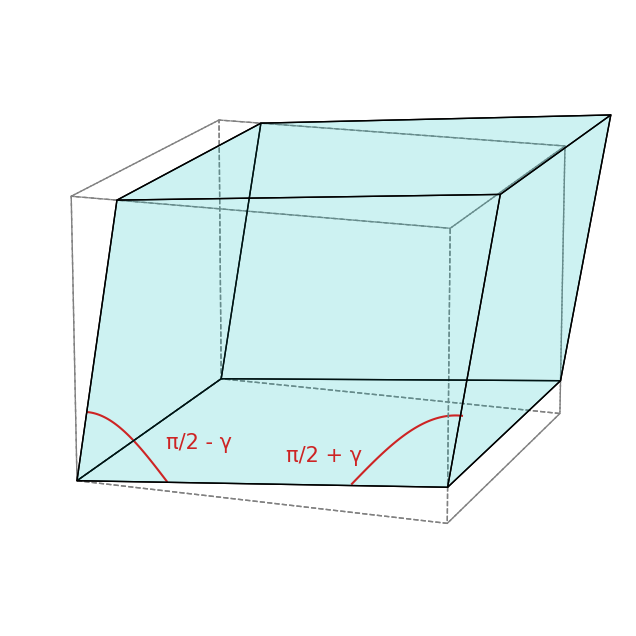

In [ ]:
#@title Figura 2.5. Deformacion unitaria cortantes.
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Define las coordenadas de los vértices del prisma rectangular
vertices = [
    [0, 0, 0], [2, 0, 0], [2, 2, 0.25], [0, 2, 0.25],  # Base inferior
    [0, 0.25, 2], [2, 0.25, 2], [2, 2.25, 2.25], [0, 2.25, 2.25]   # Base superior
]


# Definir las caras del prisma rectangular
caras = [
    [vertices[0], vertices[1], vertices[5], vertices[4]],  # Cara frontal
    [vertices[1], vertices[2], vertices[6], vertices[5]],  # Lado derecho
    [vertices[2], vertices[3], vertices[7], vertices[6]],  # Cara trasera
    [vertices[3], vertices[0], vertices[4], vertices[7]],  # Lado izquierdo
    [vertices[4], vertices[5], vertices[6], vertices[7]],  # Parte superior
    [vertices[0], vertices[1], vertices[2], vertices[3]]   # Parte inferior
]

# Dibujar caras del prisma
prisma_distorsionado = Poly3DCollection(caras, alpha=0.1, facecolors='c', edgecolors='black')
ax.add_collection3d(prisma_distorsionado)

vertices = [
    [0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0],  # Base inferior
    [0, 0, 2], [2, 0, 2], [2, 2, 2], [0, 2, 2]   # Base superior
]

# Definir las caras del prisma rectangular
caras = [
    [vertices[0], vertices[1], vertices[5], vertices[4]],  # Cara frontal
    [vertices[1], vertices[2], vertices[6], vertices[5]],  # Lado derecho
    [vertices[2], vertices[3], vertices[7], vertices[6]],  # Cara trasera
    [vertices[3], vertices[0], vertices[4], vertices[7]],  # Lado izquierdo
    [vertices[4], vertices[5], vertices[6], vertices[7]],  # Parte superior
    [vertices[0], vertices[1], vertices[2], vertices[3]]   # Parte inferior
]

# Dibujar caras del prisma
prisma = Poly3DCollection(caras, alpha=0, facecolors='c', edgecolors='grey', linestyle = '--')
ax.add_collection3d(prisma)

# Establecer límites en los ejes
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])

#ajustar la camara
ax.view_init(elev=15, azim=20)

def flecha_curva(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  z = p1[2] + (p2[2] - p1[2]) * np.sin(np.pi/2 * t)
  ax.plot(x, y, z, color='red')

flecha_curva([2,0.5,0.07],[2,0.07,0.5])
flecha_curva([2,1.5,0.2],[2,2.07,0.75])

pi_unicode = '\u03C0'  # Símbolo unicode de pi
gamma_unicode = '\u03B3'  # Símbolo unicode de gamma

ax.text(2,0.5,0.3,f"{pi_unicode}/2 - {gamma_unicode}",fontsize= 15, color ='red')
ax.text(2,1.15,0.3,f"{pi_unicode}/2 + {gamma_unicode}",fontsize= 15, color ='red')

ax.axis('off')
plt.show()

El ángulo $γ$ es una medida de la **distorsión** o cambio en la forma del elemento y se denomina **deformación unitaria cortante**. Dado que la deformación unitaria cortante es un ángulo, por lo general se mide en grados o radianes.

##2.4. Ley de Hooke en Cortante.
Para muchos materiales, la parte inicial del diagrama de esfuerzo-deformación unitaria en cortante es una recta que pasa por el origen, al igual que en tensión. Para esta región linealmente elástica, el esfuerzo cortante y la deformación unitaria en cortante son proporcionales, y por lo tanto, tenemos la siguiente ecuación para la **ley de Hooke en cortante**:

$$ \tau = G\cdot\gamma \quad (2.6)$$

En donde G es el módulo de elasticidad en cortante, el cual es una constante que depende de cada material, al igual que el módulo de elasticidad E. Tienen las mismas unidades de medida, de fuerza sobre unidad de área.



##2.5 Torsion
Un caso idealizado de carga torsional se representa en la figura 2.6a, donde se muestra una barra recta soportada en un extremo y cargada por dos pares de fuerzas iguales y opuestas. El primer par consiste en las fuerzas $P_1$ que actúan cerca del punto medio de la barra, y el segundo par consiste en las fuerzas $P_2$ que actúan en el extremo. Cada par de fuerzas forma un par de torsión que tiende a torcer la barra con respecto a su eje longitudinal. Como sabemos de la estática, el momento de un par de torsión es igual al producto de una de las fuerzas y la distancia perpendicular entre las líneas de acción de las fuerzas; por tanto, el primer par de torsión tiene un momento $T_1=P_1d_1$ y el segundo tiene un momento $T_2=P_2d_2$.

El momento de un par de torsión se puede representar mediante un vector en forma de una flecha con cabeza doble, como se muestra en la figura 2.6b. Esta flecha es perpendicular al plano que contiene el par de torsión.

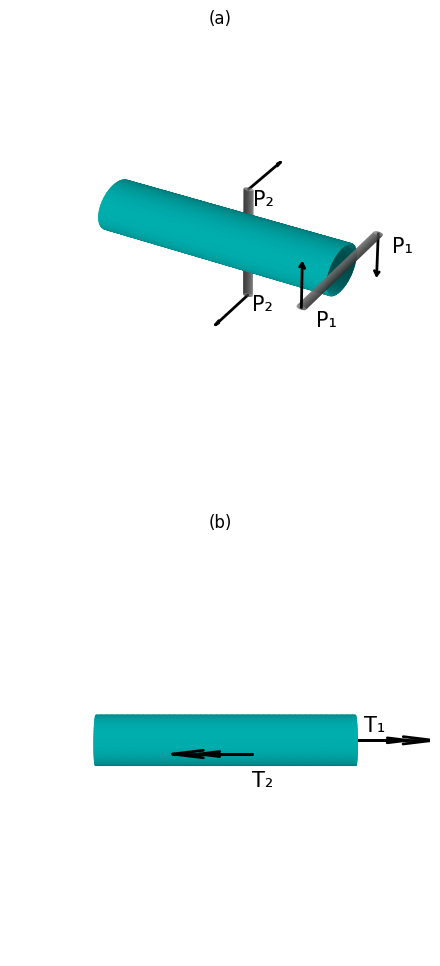

In [ ]:
#@title Figura 2.6. Barra sometida a pares de torsion $T_1$ y $T_2$.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 12))
#Definir la disposición de subgráficos utilizando GridSpec
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1])

#Definir los axs en la matriz de graficos
ax1 = fig.add_subplot(gs[0], projection='3d')
ax2 = fig.add_subplot(gs[1], projection ='3d')

for ax in [ax1,ax2]:
  #definimos la longitud del cilindro y la superficie de la malla
  phi = np.linspace(0, 2*np.pi, 1000)
  xline = np.linspace(0, 5, 100)
  X, PHI = np.meshgrid(xline, phi)

  # Creamos una malla tridimensional cilindrica
  X, PHI = np.meshgrid(xline, phi)
  Z = 1 * np.cos(PHI)
  Y = 1 * np.sin(PHI)

  # Dibujamos la superficie del cilindro
  ax.plot_surface(X, Y, Z, color='c', alpha=1, edgecolors='c')

  # Establecer límites en los ejes
  ax.set_xlim([0, 5])
  ax.set_ylim([-4, 4])
  ax.set_zlim([-4, 4])

  #definimos la longitud del cilindro y la superficie de la malla
  phi = np.linspace(0, 2*np.pi, 100)
  yline = np.linspace(-2.5, 2.5, 100)
  Y, PHI = np.meshgrid(yline, phi)

  # Creamos una malla tridimensional cilindrica
  Y, PHI = np.meshgrid(yline, phi)
  X = 0.1 * np.cos(PHI)
  Z = 0.1 * np.sin(PHI)
  if ax == ax1:
    # Dibujamos la superficie del cilindro
    ax.plot_surface(X+5, Y, Z, color='grey', alpha=1)
    ax.plot_surface(X+3, Z, Y, color='grey', alpha=1)
    for i, j, k,l,m in [(5,-2.5,0,2,0),(5,2.5,0,-2,0),(3,0,2.5,0,2),(3,0,-2.5,0,-2)]:
      ax.quiver(i,j,k,0,m,l, color='black', arrow_length_ratio=0.1, linewidth=2,capstyle='round')
      ax.set_title("(a)")
      if i == 5:
        ax.text(i+0.3,j,k-0.7,"P\u2081",fontsize= 15, color ='black')
      else:
        ax.text(i+0.1,j,k-0.7,"P\u2082",fontsize= 15, color ='black')
  else:
    for i, j,k  in [(5,1,0),(3,-1,-1.6)]:
      ax.quiver(i,k,0,j,0,0, color='black', arrow_length_ratio=0.4, linewidth=2,capstyle='round',edgecolors='black')
      ax.quiver(i,k,0,1.5*j,0,0, color='black', arrow_length_ratio=0.4, linewidth=2,capstyle='round',edgecolors='black')
      if i == 5:
        ax.text(i+0.2,j,k,"T\u2081",fontsize= 15, color ='black')
      else:
        ax.text(i,j,k,"T\u2082",fontsize= 15, color ='black')
    ax.set_title("(b)")
    #ajustar la camara
    ax.view_init(elev=15, azim=-90)
  # Dibujamos los círculos
  p1 = Circle((0, 0), 1, color='c')
  ax.add_patch(p1)
  art3d.pathpatch_2d_to_3d(p1, z=5, zdir="x")

  p2 = Circle((0, 0), 1, color='c')
  ax.add_patch(p2)
  art3d.pathpatch_2d_to_3d(p2, z=0, zdir="x")

  #ajustar la camara
  ax.axis("off")


plt.show()

Para el análisis de la torsión se admiten las siguientes hipótesis básicas:

- Una sección plana de material perpendicular al eje de un miembro circular permanece plana después de aplicar los pares de torsión.
- En un miembro circular sometido a un par de torsión, las deformaciones unitarias cortantes varían linealmente desde el eje central, alcanzando su máximo valor en la periferia.
- El material es linealmente elástico, la ley de Hooke es aplicable y se infiere que el esfuerzo cortante es proporcional a la deformación unitaria cortante.

Iniciamos nuestro estudio de la torsión al considerar una barra prismática con una sección transversal circular que es torsionada por pares de torsión $T$ que actúan en sus extremos, como se muestra en la figura 2.7a. Para ayudar a visualizar la deformación de la barra, imagine que el extremo izquierdo de la misma (figura 2.7a) está fijo. Luego, debido a la acción del par de torsión $T$, el extremo derecho girará con respecto al extremo izquierdo un ángulo pequeño $\phi$, conocido como ángulo de torsión. Debido a esta rotación, una línea recta longitudinal pq en la superficie de la barra se convertirá en la curva helicoidal $pq'$, donde $q’$ es la posición del punto q después de que la sección transversal extrema ha girado el ángulo $\phi$, como se muestra en la figura 2.7b.




####Figura 2.7. Defromaciones de una barra circular en torsion pura.
$$ (a)$$
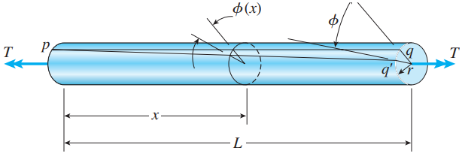

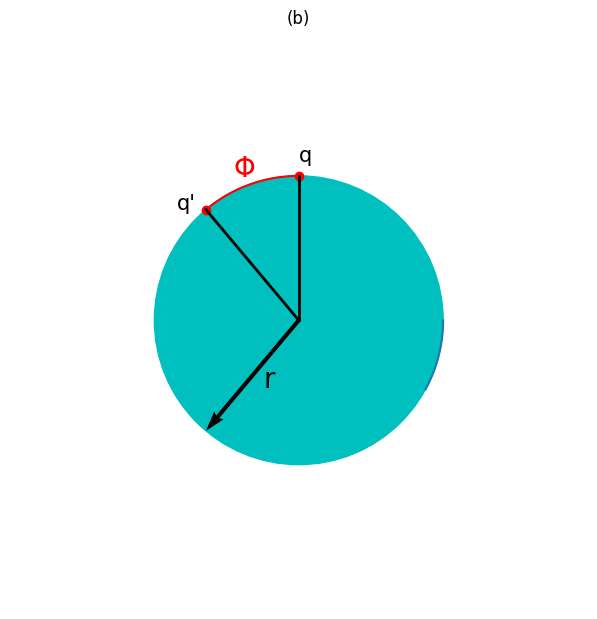

In [ ]:
#@title Figura 2.7. Defromaciones de una barra circular en torsion pura.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

fig = plt.figure(figsize=(20, 7.5))

ax2 = fig.add_subplot()


circle = plt.Circle((0, 0), 1, color='c', alpha=1)

# Agregar el círculo al cuarto subgráfico (ax2)
ax2.add_patch(circle)
ax2.set_aspect('equal')
ax2.set_ylim([-2, 2])
ax2.set_xlim([-2, 2])

def dist1(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  z = p1[2] + (p2[2] - p1[2]) * t
  ax2.plot(x, y, z, color='black',linewidth=2)

def dist2(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  ax2.plot(x, y, color='black',linewidth=2)

def arco(a1,a2,h,k):
  angulos = np.linspace(a1,a2,100)
  x= np.cos(angulos)
  y=np.sin(angulos)
  ax2.plot(x,y, color = 'red')

#puntos p y q de la seccion en grafico 2
ax2.scatter(0,1, color='red')
ax2.scatter(-np.cos(50/180*np.pi),+np.sin(50/180*np.pi), color='red')
ax2.text(0,1.1,'q', fontsize=15, color='black')
ax2.text(-np.cos(50/180*np.pi)-.2,+np.sin(50/180*np.pi),"q'", fontsize=15, color='black')
#arco de cia en grafico 2
arco(np.pi/2,130/180*np.pi,0,0)
ax2.text(-0.45,1,'\u03A6', fontsize=20, color='r')
#lineas y flechas en grafico 2
dist2([0,0],[-np.cos(50/180*np.pi),+np.sin(50/180*np.pi)])
dist2([0,0],[0,1])
ax2.quiver(0,0,-np.cos(50/180*np.pi),-np.sin(50/180*np.pi), angles='xy', scale_units='xy', scale=1, width = 0.007)
ax2.text(-np.cos(50/180*np.pi)+.4,-np.sin(50/180*np.pi)+.3,"r", fontsize=20, color='black')

ax2.plot(np.cos(np.linspace(-np.cos(np.pi*60/180),0,50)),np.sin(np.linspace(-np.cos(np.pi*60/180),0,50)))
plt.title('(b)')
plt.axis('off')
plt.show()

Consideremos ahora un segmento de la barra ubicado entre dos secciones transversales separadas por una distancia dx (ver figura 2.8a). Este segmento se muestra ampliado en la figura 2.8b. En su superficie externa, identificamos un pequeño elemento abcd, con lados $ab$ y $cd$ inicialmente paralelos al eje longitudinal. Durante el torcimiento de la barra, las secciones transversales derechas giran con respecto a las secciones transversales izquierdas en un ángulo pequeño de torsión dθ, de manera que los puntos b y c se desplazan a b’ y c', respectivamente. Las longitudes de los lados del elemento, que ahora es el elemento ab'c'd, no experimentan cambios durante esta rotación pequeña, sin embargo los ángulos de las esquinas de este elemento ya no son iguales a 90º.


#### Figura 2.8. Deformacion de un elemento con longitud $dx$ cortado en una barra de torsion.

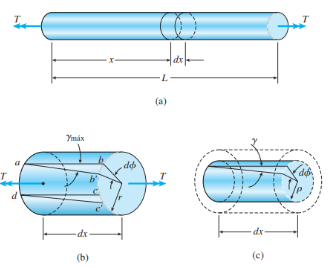

Al estar en un estado de cortante puro, las deformaciones son solamente angulares. La magnitud de esta deformación cortante en la superficie exterior de la barra max ,medido en radianes, dicho ángulo puede calcularse siguiendo la ecuación 2.7.

$$ \gamma_{max}= {\frac{bb`}{ab}} \quad (2.7)$$

El segmento $ab$ es igual a la longitud $dx$ del elemento diferencial y el arco $bb’$. Si utilizamos r para representar el radio de la barra, podemos expresar la distancia $bb'$ como el producto de $r$ y $dφ$, el mismo medido en radianes. Por consiguiente, la ecuación anterior se transforma en:

$$ \gamma_{max}={\frac{r\cdot d\phi} {dx}} \quad (2.8) $$


Si se realiza el mismo procedimiento para un elemento que se encuentra dentro de la superficie del cilindro con radio ρ, como se visualiza en la figura 2.8c, se obtiene una ecuación muy similar a la ecuación 2.8.

$$\gamma = {\frac{\rho\cdot d\phi}{dx}} \quad (2.9)$$

Aplicando la Ley de Hooke en cortante (ecuación 2.6), en las ecuaciones 2.8 y 2.9 obtenemos el siguiente resultado:

$$ \tau_{max} = G\cdot\gamma_{max} = G\cdot {\frac{r\cdot d\phi} {dx}} \quad (2.10) $$

$$ \tau = G\cdot\gamma = G\cdot {\frac{\rho\cdot d\phi}{dx}} \quad (2.11)$$

Dividiendo las ecuaciones 2.10 y 2.11.

$${\frac{\tau_{max}}{\tau}}={\frac{r}{\rho}} \quad ; {\frac{\tau_{max}}{r}}={\frac{\tau}{\rho}} = k \quad (2.12) $$

Donde $k$ es una constante, por lo tanto esta expresión indica que las tensiones cortantes en una barra circular experimentan una variación lineal con la distancia radial $ρ$ desde el centro. La deformación unitaria es nula en el centro y alcanza un valor máximo, max, en la superficie exterior.

$$ \tau = k\cdot\rho\quad (2.13)$$


####Figura 2.9. Esfuerzos cortantes en una barra circular sometira a torsion.
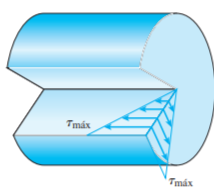

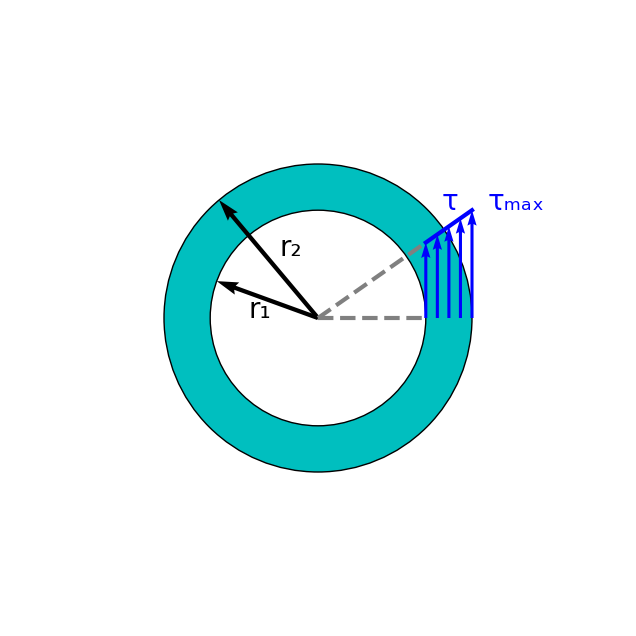

In [ ]:
#@title Figura 2.10 Esfuerzos cortantes en un tubo circular en torsion.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

circle1 = plt.Circle((0, 0), 1, facecolor='c',edgecolor='black', alpha=1)
circle2 = plt.Circle((0, 0), 0.7, facecolor='white',edgecolor='black', alpha=1)

# Agregar el círculo al cuarto subgráfico (ax)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.set_aspect('equal')
ax.set_ylim([-2, 2])
ax.set_xlim([-2, 2])

ax.quiver(0,0,-np.cos(50/180*np.pi),+np.sin(50/180*np.pi), angles='xy', scale_units='xy', scale=1, width = 0.007)
ax.quiver(0,0,-0.7*np.cos(20/180*np.pi),+0.7*np.sin(20/180*np.pi), angles='xy', scale_units='xy', scale=1, width = 0.007)

ax.plot(np.linspace(0.7,1,20),np.linspace(0.7,1,20)*0.7, color = 'blue',linewidth=3)
ax.plot(np.linspace(0,0.7,50),np.linspace(0,0.7,50)*0.7, color = 'grey',linewidth=3,linestyle='--')
ax.plot(np.linspace(0,0.7,50),np.linspace(0,0,50), color = 'grey',linewidth=3,linestyle='--')
ax.text(-0.45,0,'r\u2081', fontsize=20, color='black')
ax.text(-0.25,.4,'r\u2082', fontsize=20, color='black')
ax.text(0.8,0.7,'\u03C4', fontsize=20, color='blue')
ax.text(1.1,0.7,'\u03C4'+"\u2098" + "\u2090" + "\u2093", fontsize=20, color='blue')
for i in  np.linspace(0.7,1,5)*0.7:
  ax.quiver(i/0.7,0,0,i, angles='xy', scale_units='xy', scale=1, width = 0.005,color='blue')

ax.axis("off")

plt.show()

En el siguiente paso de nuestro análisis, buscamos establecer la relación entre los esfuerzos cortantes y el par de torsión $T$. Una vez que obtengamos esta relación, estaremos en condiciones de calcular los esfuerzos y las deformaciones unitarias en una barra ocasionados por cualquier conjunto de pares de torsión aplicados.

Los esfuerzos cortantes actúan de manera continua alrededor de la sección transversal, generando una resultante en forma de un momento equivalente al par de torsión $T$ que actúa sobre la barra. Para determinar esta resultante, consideramos un elemento de área $dA$ ubicado a una distancia radial $\rho$ desde el eje de la barra (ver figura 2.10). La fuerza cortante que actúa sobre este elemento es igual a $τdA$, donde $τ$ es el esfuerzo cortante a un radio $\rho$. El momento de esta fuerza con respecto al eje de la barra se calcula multiplicando la fuerza por su distancia desde el centro, es decir, $τ\rho dA$. Si se sustituye el valor de $T$ por la ecuación 2.13

$$ T= \int{\tau\cdot\rho\cdot dA}=\int{k\cdot\rho^2\cdot dA}= k\int{\rho^2\cdot dA}$$

La expresión  $\int{\rho^2\cdot dA}$ es el momento polar de inercia de la sección transversal, que se denota $I_p$.

$$ T = k\cdot I_p \quad; \quad k = {\frac{T}{I_p}} \quad (2.14)$$

Sustituyendo la ecuación 2.14 en la ecuación 2.13 se obtiene la ecuación que nos permite calcular los esfuerzos cortantes en una sección circular, en función al torsor $T$, la geometría de la sección y la distancia radial $ρ$ desde el centro.

$$ \tau = {\frac{\tau\cdot\rho}{I_p}} \quad (2.15)$$


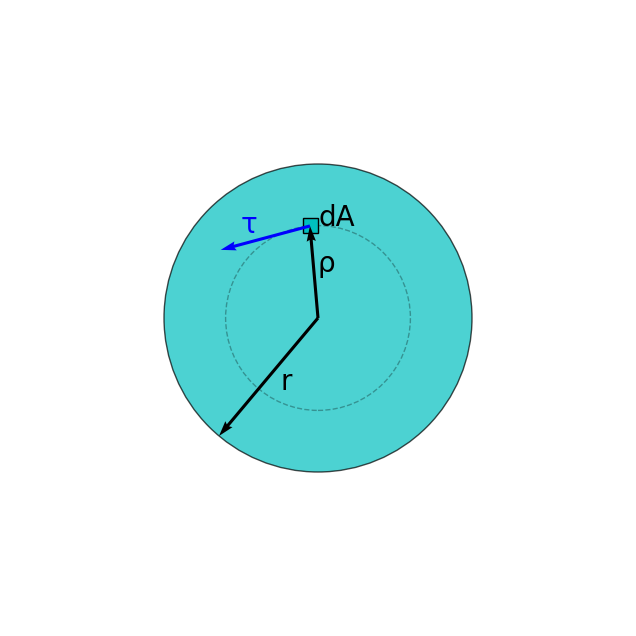

In [ ]:
#@title Figura 2.11. Determinacion de la resultante de los esfuerzos cortantes que actuan en una seccion transversal.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

circle1 = plt.Circle((0, 0), 1, facecolor='c', edgecolor='black', alpha=0.7)
circle2 = plt.Circle((0, 0), 0.6, facecolor='none', edgecolor='black', linestyle='--', alpha=0.3)
rectangle = plt.Rectangle((-0.1, 0.55), 0.1, 0.1, facecolor='c', edgecolor='black', alpha=1)


# Agregar el círculo al cuarto subgráfico (ax)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(rectangle)
ax.set_aspect('equal')
ax.set_ylim([-2, 2])
ax.set_xlim([-2, 2])

ax.quiver(0,0,-0.6*np.cos(85/180*np.pi),+0.6*np.sin(85/180*np.pi), angles='xy', scale_units='xy', scale=1, width = 0.005)
ax.quiver(0,0,-np.cos(50/180*np.pi),-np.sin(50/180*np.pi), angles='xy', scale_units='xy', scale=1, width = 0.005)
ax.text(-np.cos(50/180*np.pi)+.4,-np.sin(50/180*np.pi)+.3,"r", fontsize=20, color='black')
ax.text(0,.3,"\u03C1", fontsize=20, color='black')
ax.quiver(-0.6*np.cos(85/180*np.pi),+0.6*np.sin(85/180*np.pi),-0.6*np.cos(15/180*np.pi),+0.6*np.sin(-15/180*np.pi), angles='xy', scale_units='xy', scale=1, width = 0.005, color='blue')
ax.text(-0.5,0.55,'\u03C4', fontsize=20, color='blue')
ax.text(0,0.6, "dA", fontsize=20, color='black')
ax.axis("off")
plt.show()

Aplicando las ecuaciones 2.6 y  2.15 en la ecuación 2.9, nos permite tener una expresión que calcule el ángulo relativo entre dos secciones:

$$ d\phi = {\frac{T}{G\cdot I_p}} \quad (2.16)$$

Integrando a lo largo de la barra circular la ecuación 2.16 entre dos puntos A y B, la ecuación 2.16 se transforma en la siguiente expresión:

$$ \phi_{B/A} = \int_A^B {\frac{T}{G\cdot\ I_p}} (2.17)$$

##2.6 Ejercicios

Un puntal $S$ de acero que sirve como riostra para un malacate marino transmite
una fuerza de compresión $P = 12 kips$ a la plataforma de un muelle (figura (a)). El puntal tiene una sección transversal hueca con espesor de pared $t = 0.375 in$ (figura (b)) y el ángulo $\theta$ entre el puntal y la horizontal es $40°$. Un pasador que atraviesa el puntal transmite la fuerza de compresión del puntal a dos placas de unión $G$ que están soldadas a la placa base $B$. Cuatro pernos de anclaje sujetan la placa base a la plataforma.
El diámetro del pasador es $d_{pasador} = 0.75 in$, el espesor de las placas de unión es $t_G = 0.625 in$, el espesor de la placa base es $t_B = 0.375 in$ y el diámetro de los pernos de anclaje es $d_{perno} = 0.50 in$.
Determine los esfuerzos siguientes:
- (a) el esfuerzo de soporte entre el puntal y
el pasador,
- (b) el esfuerzo cortante en el pasador,
- (c) el esfuerzo de soporte entre el pasador y las placas de unión,
- (d) el esfuerzo de soporte entre los pernos de anclaje y la placa base y
- (e) el esfuerzo cortante en los pernos de anclaje. (No tenga en cuenta la
fricción entre la placa base y la plataforma.)

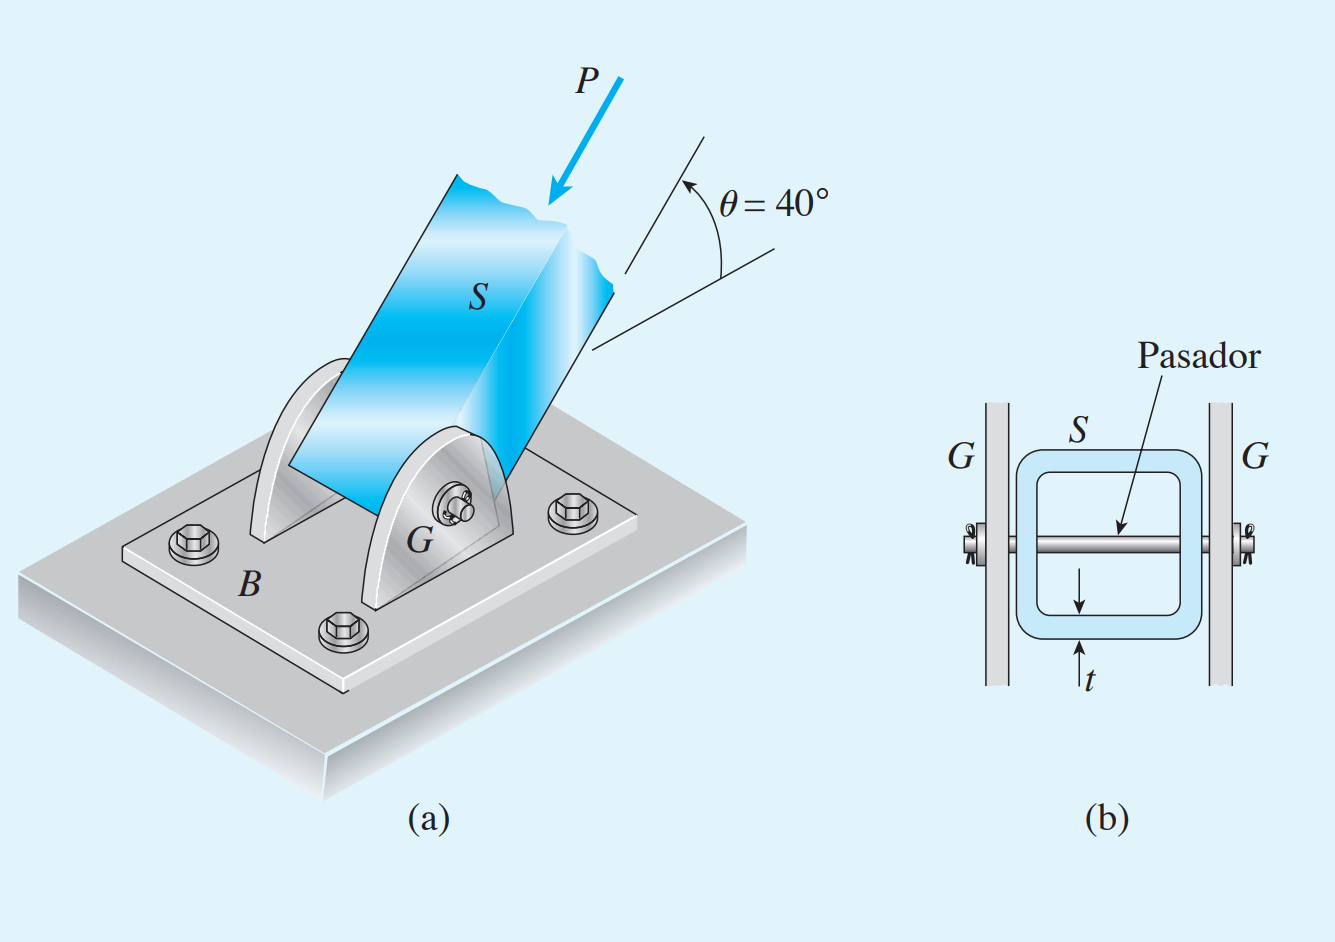

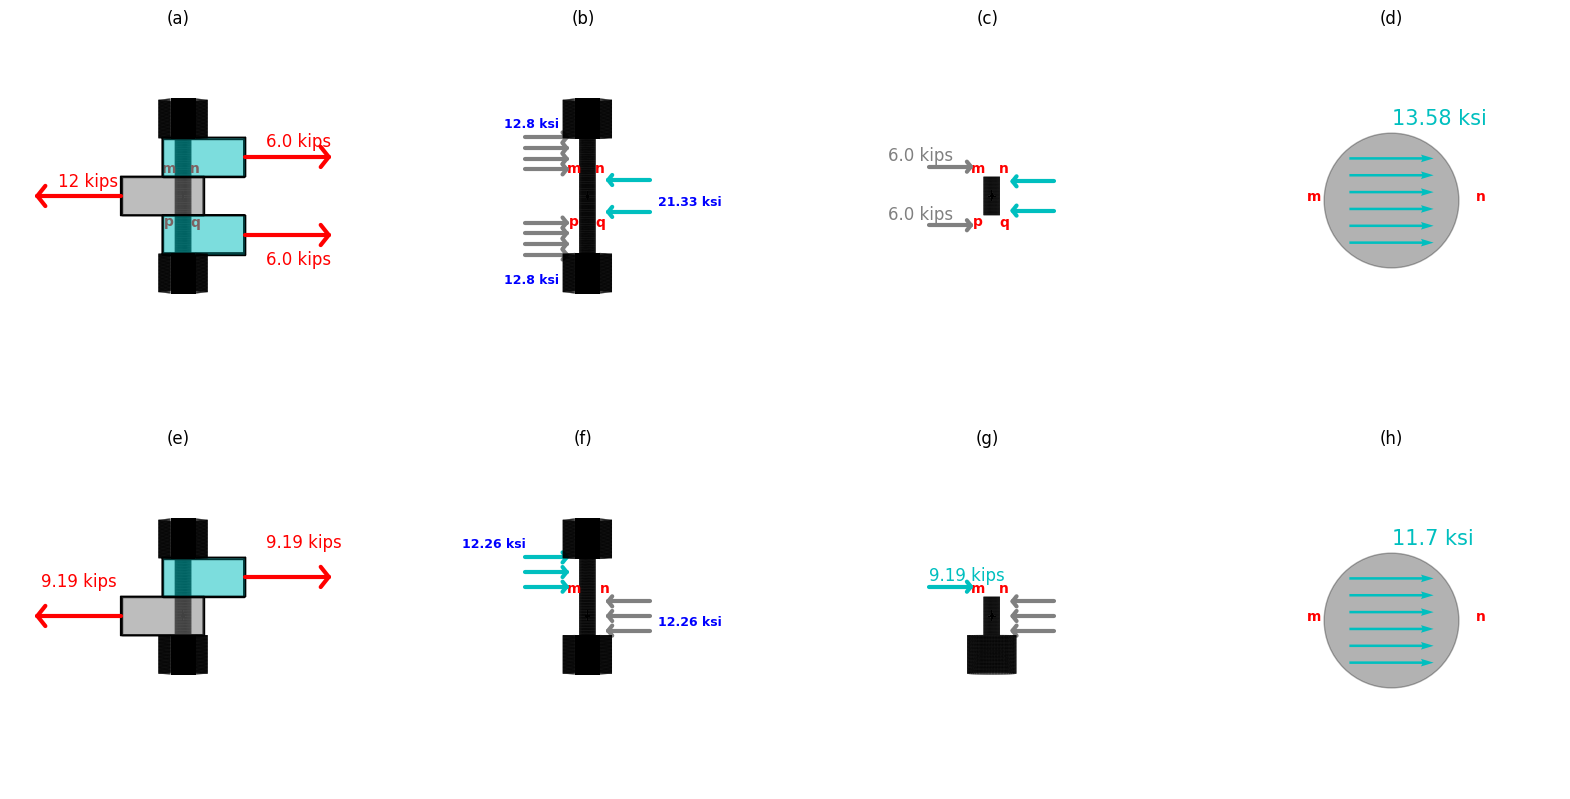

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec


P= 12 #kips
t_puntal= 0.375 #in
theta = 40 #grados
d_pasador = 0.75 #in
t_G = 0.625 #in
t_B = 0.375 #in
d_perno = 0.5 #in


#(a) Esfuerzo de soporte entre puntal y pasador. sigma_a=P/(2*A_a) (ecuacion 2.1)
#area de soporte entre puntal y pasador A_a = d_pasador*t_puntal
A_a = d_pasador*t_puntal
sigma_a = 12/(2*A_a)

#(b) Esfuerzo cortante en el pasador. tau_b = P/(2*A_b) (ecuacion 2.3)
#area de corte en el pasador A_b= np.pi*d_pasador**2/4
A_b= np.pi*d_pasador**2/4
tau_b = P/(2*A_b)

#(c) Esfuerzo de soporte entre el pasador y las placas de soporte sigma_c = P/(2*A_c) (ecuacion 2.1)
#area de soporte entre el pasador y placas de soporte A_c = d_pasador*t_G
A_c= d_pasador*t_G
sigma_c = P/(2*A_c)

#(d) Esfuerzo de soporte entre los pernos y la placa de base sigma_d = P*np.cos(np.radians(theta))/(4*A_d) (ecuacion 2.1)
#area ded soporte entre los pernos y la placa de base A_d = d_pasador*t_B
A_d = d_perno*t_B
sigma_d = P*np.cos(np.radians(theta))/(4*A_d)

#(e) Esfuerzo de corte en los pernos de anclaje tau_e = P*np.cos(np.radians(theta))/(4*A_e)
#area de corte de los pernos de anclaje A_e = np.pi*d_perno**2/4
A_e = np.pi*d_perno**2/4
tau_e = P*np.cos(np.radians(theta))/(4*A_e)

#graficos de esfuerzos en el pasador

fig = plt.figure(figsize=(20, 10))
##Definir la disposición de subgráficos utilizando GridSpec
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1,1,1], height_ratios=[1,1])

ax1 = fig.add_subplot(gs[0,0], projection='3d')

# Define las coordenadas de los vértices del prisma rectangular A
vertices1 = [
    [0, 0, 0], [2, 0, 0], [2, 1, 0], [0, 1, 0],  # Base inferior
    [0, 0, 0.2], [2, 0, 0.2], [2, 1, 0.2], [0, 1, 0.2]   # Base superior
]

# Definir las caras del prisma rectangular A
caras1 = [
    [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],  # Cara frontal
    [vertices1[1], vertices1[2], vertices1[6], vertices1[5]],  # Lado derecho
    [vertices1[2], vertices1[3], vertices1[7], vertices1[6]],  # Cara trasera
    [vertices1[3], vertices1[0], vertices1[4], vertices1[7]],  # Lado izquierdo
    [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],  # Parte superior
    [vertices1[0], vertices1[1], vertices1[2], vertices1[3]]   # Parte inferior
]

# Dibujar caras del prisma A
prisma = Poly3DCollection(caras1, alpha=0.3, facecolors='grey', edgecolors='black')
ax1.add_collection3d(prisma)

#traslacion del prisma A para generar los prismas C
traslacion1 = np.array([1, 0, 0.2])
traslacion2 = np.array([1, 0, -0.2])

vertices2 = np.array(vertices1) + traslacion1
vertices3 = np.array(vertices1) + traslacion2

caras2 = [
    [vertices2[0], vertices2[1], vertices2[5], vertices2[4]],  # Cara frontal
    [vertices2[1], vertices2[2], vertices2[6], vertices2[5]],  # Lado derecho
    [vertices2[2], vertices2[3], vertices2[7], vertices2[6]],  # Cara trasera
    [vertices2[3], vertices2[0], vertices2[4], vertices2[7]],  # Lado izquierdo
    [vertices2[4], vertices2[5], vertices2[6], vertices2[7]],  # Parte superior
    [vertices2[0], vertices2[1], vertices2[2], vertices2[3]]   # Parte inferior
]

caras3 = [
    [vertices3[0], vertices3[1], vertices3[5], vertices3[4]],  # Cara frontal
    [vertices3[1], vertices3[2], vertices3[6], vertices3[5]],  # Lado derecho
    [vertices3[2], vertices3[3], vertices3[7], vertices3[6]],  # Cara trasera
    [vertices3[3], vertices3[0], vertices3[4], vertices3[7]],  # Lado izquierdo
    [vertices3[4], vertices3[5], vertices3[6], vertices3[7]],  # Parte superior
    [vertices3[0], vertices3[1], vertices3[2], vertices3[3]]   # Parte inferior
]

prisma_trasladado1 = Poly3DCollection(caras2, alpha=0.3, facecolors='c', edgecolors='black')
ax1.add_collection3d(prisma_trasladado1)

prisma_trasladado2 = Poly3DCollection(caras3, alpha=0.3, facecolors='c', edgecolors='black')
ax1.add_collection3d(prisma_trasladado2)

#se dibuja el perno
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z1 = np.linspace(-0.2, 0.4, resolucion)
theta, z1 = np.meshgrid(theta, z1)
x1 = 1.5+r * np.cos(theta)
y1 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x1, y1, z1, color='black', alpha=1)

#Graficar cabezas del tornillo
r = 0.6  # Radio del cilindro
resolucion = 7  # Resolución para la superficie del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z2 = np.linspace(0.4, 0.6, 100)
theta, z2 = np.meshgrid(theta, z2)
x2 = 1.5+r * np.cos(theta)
y2 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x2, y2, z2, color='black', alpha=1)

r = 0.6  # Radio del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z3 = np.linspace(-0.2, -0.4, 100)
theta, z3 = np.meshgrid(theta, z3)
x3 = 1.5+r * np.cos(theta)
y3 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax1.plot_surface(x3, y3, z3, color='black', alpha=1)

# Graficamos las fuerzas
fuerza1_inicio = [0, 0, 0.1]
fuerza1_direccion = [-1, 0, 0]
longitud1 = 2

fuerza2_inicio = [3, 0, 0.3]
fuerza2_direccion = [1, 0, 0]
longitud2 = 2

fuerza3_inicio = [3, 0, -0.1]
fuerza3_direccion = [1, 0, 0]
longitud3 = 2

ax1.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
ax1.quiver(*fuerza2_inicio, *fuerza2_direccion, length=longitud2, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
ax1.quiver(*fuerza3_inicio, *fuerza3_direccion, length=longitud3, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')

#textos
ax1.text(-1.5,0,0.15,f'{round(P,2)} kips',fontsize= 12, color = 'red')
ax1.text(3.5,0,0.35,f'{round(P/2,2)} kips',fontsize= 12, color ='red')
ax1.text(3.5,0,-0.25,f'{round(P/2,2)} kips',fontsize= 12, color ='red')
ax1.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax1.text(0.65+0.4,0,-0.05,'p',fontsize= 10, color ='red',fontweight='bold')
ax1.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')
ax1.text(0.65+1.02,-2,-0.05,'q',fontsize= 10, color ='red',fontweight='bold')

#vista del grafico
ax1.set_xlim([-1, 4])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-0.3, 0.5])
ax1.view_init(elev=0, azim=-90)
ax1.axis('off')
ax1.set_title('(a)')


ax2 = fig.add_subplot(gs[0,1], projection='3d')

# Graficar el cilindro
ax2.plot_surface(x1, y1, z1, color='black', alpha=1)
ax2.plot_surface(x2, y2, z2, color='black', alpha=1)
ax2.plot_surface(x3, y3, z3, color='black', alpha=1)
ax2.view_init(elev=0, azim=-90)
ax2.set_xlim([-1, 4])
ax2.set_ylim([-2, 2])
ax2.set_zlim([-0.3, 0.5])
ax2.set_title('(b)')
ax2.axis('off')

#graficar las fuerzas
for i in np.linspace(-0.2,0.4,12):
  if (i>=0 and i <= 0.05) or (i>= 0.15 and i <=0.2):
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax2.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif (i >= -0.2 and i <0) or (i> 0.2 and i <=0.4):
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax2.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
#textos 123
ax2.text(-0.5,0,0.45,f'{round(sigma_c,2)} ksi',fontsize= 9, color ='blue',fontweight='bold')
ax2.text(-0.5,0,-0.35,f'{round(sigma_c,2)} ksi',fontsize= 9, color ='blue',fontweight='bold')
ax2.text(3.2,0,0.05,f'{round(sigma_a,2)} ksi',fontsize= 9, color ='blue',fontweight='bold')

#textos mnpq
ax2.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+0.4,0,-0.05,'p',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')
ax2.text(0.65+1.02,-2,-0.05,'q',fontsize= 10, color ='red',fontweight='bold')

ax3 = fig.add_subplot(gs[0,2], projection='3d')
# Graficar el cilindro
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z4 = np.linspace(0, 0.2, resolucion)
theta, z4 = np.meshgrid(theta, z4)
x4 = 1.5+r * np.cos(theta)
y4 = 0.5+r * np.sin(theta)

#graficar el segmento de tornillo
ax3.plot_surface(x4, y4, z4, color='black', alpha=1)
ax3.view_init(elev=0, azim=-90)
ax3.set_xlim([-1, 4])
ax3.set_ylim([-2, 2])
ax3.set_zlim([-0.3, 0.5])
ax3.set_title('(c)')
ax3.axis('off')

for i in np.linspace(-0.2,0.4,9):
  if (i>=0 and i <= 0.05) or (i>= 0.15 and i <=0.2):
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax3.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif (i>= -0.1 and i<=0) or (i>=0.2 and i <=0.3):
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax3.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
    texto_inicio = [-1, 0, i+0.03]
    ax3.text(*texto_inicio,f'{round(P/2,2)} kips',fontsize= 12, color ='grey')

#textos mnpq
ax3.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+0.4,0,-0.05,'p',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')
ax3.text(0.65+1.02,-2,-0.05,'q',fontsize= 10, color ='red',fontweight='bold')

ax4 = plt.subplot(gs[0,3])
circle = plt.Circle((0, 0), 0.4, color='black', alpha=0.3)

# Agregar el círculo al cuarto subgráfico (ax4)
ax4.add_patch(circle)
ax4.set_aspect('equal')
ax4.set_ylim([-1, 1])
ax4.set_xlim([-1, 1])

#grafico de esfuerzos cortantes en el circulo
for i in np.linspace(-0.25,0.25,6):
  ax4.quiver(-0.25, i, 0.5, 0, angles='xy', scale_units='xy', scale=1, color='c')

#textos mn
ax4.text(-0.5,0,'m', fontsize= 10, color ='red',fontweight='bold')
ax4.text(0.5,0,'n', fontsize= 10, color ='red',fontweight='bold')
ax4.text(0,0.45,f'{round(tau_b,2)} ksi', fontsize= 15, color ='c')

ax4.axis('off')
ax4.set_title('(d)')

#grafico de esfuerzos en el perno

ax5 = fig.add_subplot(gs[1,0], projection='3d')

# Define las coordenadas de los vértices del prisma rectangular A
vertices1 = [
    [0, 0, 0], [2, 0, 0], [2, 1, 0], [0, 1, 0],  # Base inferior
    [0, 0, 0.2], [2, 0, 0.2], [2, 1, 0.2], [0, 1, 0.2]   # Base superior
]

# Definir las caras del prisma rectangular A
caras1 = [
    [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],  # Cara frontal
    [vertices1[1], vertices1[2], vertices1[6], vertices1[5]],  # Lado derecho
    [vertices1[2], vertices1[3], vertices1[7], vertices1[6]],  # Cara trasera
    [vertices1[3], vertices1[0], vertices1[4], vertices1[7]],  # Lado izquierdo
    [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],  # Parte superior
    [vertices1[0], vertices1[1], vertices1[2], vertices1[3]]   # Parte inferior
]

# Dibujar caras del prisma A
prisma = Poly3DCollection(caras1, alpha=0.3, facecolors='grey', edgecolors='black')
ax5.add_collection3d(prisma)

#traslacion del prisma A para generar los prismas C
traslacion1 = np.array([1, 0, 0.2])
traslacion2 = np.array([1, 0, -0.2])

vertices2 = np.array(vertices1) + traslacion1

caras2 = [
    [vertices2[0], vertices2[1], vertices2[5], vertices2[4]],  # Cara frontal
    [vertices2[1], vertices2[2], vertices2[6], vertices2[5]],  # Lado derecho
    [vertices2[2], vertices2[3], vertices2[7], vertices2[6]],  # Cara trasera
    [vertices2[3], vertices2[0], vertices2[4], vertices2[7]],  # Lado izquierdo
    [vertices2[4], vertices2[5], vertices2[6], vertices2[7]],  # Parte superior
    [vertices2[0], vertices2[1], vertices2[2], vertices2[3]]   # Parte inferior
]

prisma_trasladado1 = Poly3DCollection(caras2, alpha=0.3, facecolors='c', edgecolors='black')
ax5.add_collection3d(prisma_trasladado1)

#se dibuja el perno
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z1 = np.linspace(0, 0.4, resolucion)
theta, z1 = np.meshgrid(theta, z1)
x1 = 1.5+r * np.cos(theta)
y1 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax5.plot_surface(x1, y1, z1, color='black', alpha=1)

#Graficar cabezas del tornillo
r = 0.6  # Radio del cilindro
resolucion = 7  # Resolución para la superficie del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z2 = np.linspace(0.4, 0.6, 100)
theta, z2 = np.meshgrid(theta, z2)
x2 = 1.5+r * np.cos(theta)
y2 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax5.plot_surface(x2, y2, z2, color='black', alpha=1)

r = 0.6  # Radio del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z3 = np.linspace(0, -0.2, 100)
theta, z3 = np.meshgrid(theta, z3)
x3 = 1.5+r * np.cos(theta)
y3 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax5.plot_surface(x3, y3, z3, color='black', alpha=1)

# Graficamos las fuerzas
fuerza1_inicio = [0, 0, 0.1]
fuerza1_direccion = [-1, 0, 0]
longitud1 = 2

fuerza2_inicio = [3, 0, 0.3]
fuerza2_direccion = [1, 0, 0]
longitud2 = 2

ax5.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
ax5.quiver(*fuerza2_inicio, *fuerza2_direccion, length=longitud2, color='r', arrow_length_ratio=0.1, linewidth=3,capstyle='round')

#textos
ax5.text(-1.9,0,0.25,f'{round(P*np.cos(np.radians(40)),2)} kips',fontsize= 12, color = 'red')
ax5.text(3.5,0,0.45,f'{round(P*np.cos(np.radians(40)),2)} kips',fontsize= 12, color ='red')

#vista del grafico
ax5.set_xlim([-1, 4])
ax5.set_ylim([-2, 2])
ax5.set_zlim([-0.3, 0.5])
ax5.view_init(elev=0, azim=-90)
ax5.axis('off')
ax5.set_title('(e)')

ax6 = fig.add_subplot(gs[1,1], projection='3d')

# Graficar el cilindro
ax6.plot_surface(x1, y1, z1, color='black', alpha=1)
ax6.plot_surface(x2, y2, z2, color='black', alpha=1)
ax6.plot_surface(x3, y3, z3, color='black', alpha=1)
ax6.view_init(elev=0, azim=-90)
ax6.set_xlim([-1, 4])
ax6.set_ylim([-2, 2])
ax6.set_zlim([-0.3, 0.5])
ax6.set_title('(f)')
ax6.axis('off')

#graficar las fuerzas
for i in np.linspace(-0.2,0.4,9):
  if i>=0 and i <=0.2:
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax6.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif i>=0:
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax6.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')

#textos 123
ax6.text(-1.5,0,0.45,f'{round(sigma_d,2)} ksi',fontsize= 9, color ='blue',fontweight='bold')
ax6.text(3.2,0,0.05,f'{round(sigma_d,2)} ksi',fontsize= 9, color ='blue',fontweight='bold')

#textos mnpq
ax6.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax6.text(0.65+1.15,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')

ax7 = fig.add_subplot(gs[1,2], projection='3d')
# Graficar el cilindro
# Definir los datos para el cilindro
r = 0.2  # Radio del cilindro
resolucion = 100  # Resolución para la superficie del cilindro

# Crear datos para la superficie del cilindro
theta = np.linspace(0, 2*np.pi, resolucion)
z4 = np.linspace(0, 0.2, resolucion)
theta, z4 = np.meshgrid(theta, z4)
x4 = 1.5+r * np.cos(theta)
y4 = 0.5+r * np.sin(theta)

#graficar el segmento de tornillo
ax7.plot_surface(x4, y4, z4, color='black', alpha=1)
ax7.view_init(elev=0, azim=-90)
ax7.set_xlim([-1, 4])
ax7.set_ylim([-2, 2])
ax7.set_zlim([-0.3, 0.5])
ax7.set_title('(g)')
ax7.axis('off')

for i in np.linspace(-0.2,0.4,9):
  if i>=0 and i <=0.2:
    fuerza1_inicio = [3, 0, i]
    fuerza1_direccion = [-1, 0, 0]
    longitud1 = 1
    ax7.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='grey', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
  elif (i>=0.2 and i <=0.3):
    fuerza1_inicio = [0, 0, i]
    fuerza1_direccion = [1, 0, 0]
    longitud1 = 1
    ax7.quiver(*fuerza1_inicio, *fuerza1_direccion, length=longitud1, color='c', arrow_length_ratio=0.1, linewidth=3,capstyle='round')
    texto_inicio = [0, 0, i+0.03]
    ax7.text(*texto_inicio,f'{round(P*np.cos(np.radians(40)),2)} kips',fontsize= 12, color ='c')

#textos mnpq
ax7.text(0.65+0.35,0,0.22,'m',fontsize= 10, color ='red',fontweight='bold')
ax7.text(0.65+1.02,0,0.22,'n',fontsize= 10, color ='red',fontweight='bold')

r = 0.6  # Radio del cilindro

theta = np.linspace(0, 2*np.pi, resolucion)
z3 = np.linspace(0, -0.2, 100)
theta, z3 = np.meshgrid(theta, z3)
x3 = 1.5+r * np.cos(theta)
y3 = 0.5+r * np.sin(theta)

# Graficar el cilindro
ax7.plot_surface(x3, y3, z3, color='black', alpha=1)

ax8 = plt.subplot(gs[1,3])
circle = plt.Circle((0, 0), 0.4, color='black', alpha=0.3)

# Agregar el círculo al cuarto subgráfico (ax4)
ax8.add_patch(circle)
ax8.set_aspect('equal')
ax8.set_ylim([-1, 1])
ax8.set_xlim([-1, 1])

#grafico de esfuerzos cortantes en el circulo
for i in np.linspace(-0.25,0.25,6):
  ax8.quiver(-0.25, i, 0.5, 0, angles='xy', scale_units='xy', scale=1, color='c')

#textos mn
ax8.text(-0.5,0,'m', fontsize= 10, color ='red',fontweight='bold')
ax8.text(0.5,0,'n', fontsize= 10, color ='red',fontweight='bold')
ax8.text(0,0.45,f'{round(tau_e,2)} ksi', fontsize= 15, color ='c')

ax8.axis('off')
ax8.set_title('(h)')
plt.show()




Un eje sólido de acero $ABCDE$ (figura 3.17) con diámetro $d = 30 mm$ gira libremente sobre cojinetes en los puntos $A$ y $E$. El eje es impulsado por un engrane en $C$ que aplica un par de torsión $T_2 = 450 N \cdot m$ en el sentido que se muestra en la figura. Los engranes $B$ y $D$ son impulsados por el eje y tienen pares de torsión resistentes $T_1 =275 N \cdot m$ y $T_3 = 175 N \cdot m$, respectivamente, que actúan en el sentido opuesto al par de torsión $T_2$. Los segmentos $BC$ y $CD$ tienen longitudes $L_{BC} = 500 mm$ y $L_{CD} =
400 mm$, respectivamente, y el módulo de cortante es $G = 80 GPa$.

Determine el esfuerzo cortante máximo en cada parte del eje y el ángulo de
torsión entre los engranes $B$ y $D$.
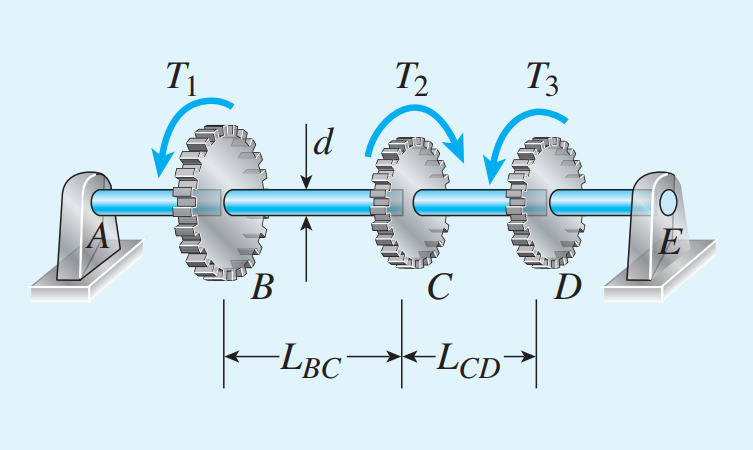

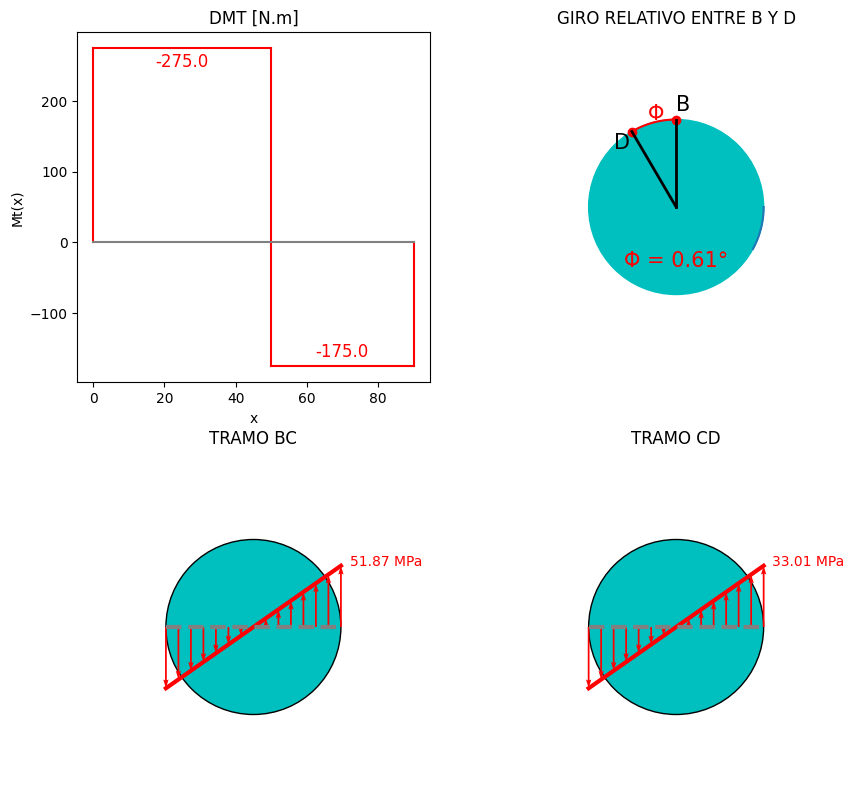

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

#Datos
T2 = 450 #N*m
T1 = -T2*11/18 #N*m
T3 = -T2*7/18 #N*m
G = 80*10**9 #Pa
Lbc= 500 #mm
Lcd = 400 #m
d= 30 #mm

#calculo de la inercia polar
Ip= np.pi*(d/1000)**4/32

#Resolucion del ejercicio
#Calculo de esfuerzos maximos en cada tramo. ecuacion 2.15
tbc = (T1*d/2000)/(Ip)
tcd = (T3*d/2000)/(Ip)

#calculo del giro relativo entre las secciones B y D. ecuacion 2.17
giro = -T1*(Lbc/1000)/(G*Ip) + T3*(Lcd/1000)/(G*Ip)

#graficos
fig = plt.figure(figsize=(10, 10))
##Definir la disposición de subgráficos utilizando GridSpec
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1,1])

#diagrama de momento torsor
ax1 = plt.subplot(gs[0,0])
tramoBC = np.linspace(0,50,100)
Mt_BC = np.full_like(tramoBC,-T1)
tramoCD= np.linspace(50,90,100)
Mt_CD = np.full_like(tramoCD,T3)

##lineas verticales del diagrama
ax1.plot(np.full_like(Mt_BC,0),np.linspace(0,-T1,100), color = 'red')
ax1.plot(np.full_like(Mt_CD,Lbc/10),np.linspace(-T1,T3,100), color = 'red')
ax1.plot(np.full_like(Mt_CD,Lcd/10+Lbc/10),np.linspace(0,T3,100), color = 'red')

#eje horizontal
ax1.plot(np.linspace(0,Lbc/10+Lcd/10,100),np.full_like(Mt_CD,0), color = 'grey')

#textos de valores
ax1.text(Lbc/20,(-T1+20*abs(T1)/T1), T1, color= 'red',fontsize=12, ha='center', va='center')
ax1.text(Lbc/10+Lcd/20,(T3-20*abs(T3)/T3), T3, color= 'red',fontsize=12, ha='center', va='center')

#Tramos de valores de torsion
ax1.plot(tramoBC,Mt_BC, color="red")
ax1.plot(tramoCD,Mt_CD, color="red")
ax1.set_title('DMT [N.m]')
ax1.set_ylabel('Mt(x)')
ax1.set_xlabel('x')

#diagrama de esfuerzos cortantes
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])

for ax in [ax2,ax3]:
  circle1 = plt.Circle((0, 0), 1, facecolor='c',edgecolor='black', alpha=1)

  # Agregar el círculo al cuarto subgráfico (ax2)
  ax.add_patch(circle1)
  ax.set_aspect('equal')
  ax.set_ylim([-2, 2])
  ax.set_xlim([-2, 2])


  ax.plot(np.linspace(-1,1,20),np.linspace(-1,1,20)*0.7, color = 'red',linewidth=3)
  ax.plot(np.linspace(-1,1,50),np.linspace(0,0,50), color = 'grey',linewidth=3,linestyle='--')
  for i in  np.linspace(-1,1,15)*0.7:
    ax.quiver(i/0.7,0,0,i, angles='xy', scale_units='xy', scale=1, width = 0.005,color='red')
  ax.axis('off')
  if ax== ax2 :
    ax.text(1.1,0.7,f'{round(abs(tbc)/(10**6),2)} MPa', fontsize=10, color='red')
    ax.set_title('TRAMO BC')
  elif ax== ax3:
    ax.text(1.1,0.7,f'{round(abs(tcd)/(10**6),2)} MPa', fontsize=10, color='red')
    ax.set_title('TRAMO CD')

#grafica de giro relativo entre B y D
ax4 = plt.subplot(gs[0,1])

circle = plt.Circle((0, 0), 1, color='c', alpha=1)

# Agregar el círculo al cuarto subgráfico (ax2)
ax4.add_patch(circle)
ax4.set_aspect('equal')
ax4.set_ylim([-2, 2])
ax4.set_xlim([-2, 2])

def dist1(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  z = p1[2] + (p2[2] - p1[2]) * t
  ax4.plot(x, y, z, color='black',linewidth=2)

def dist2(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  ax4.plot(x, y, color='black',linewidth=2)

def arco(a1,a2,h,k):
  angulos = np.linspace(a1,a2,100)
  x= np.cos(angulos)
  y=np.sin(angulos)
  ax4.plot(x,y, color = 'red')

#puntos q y q' de la seccion en grafico 2
ax4.scatter(0,1, color='red')
ax4.scatter(np.cos(np.pi/2+giro*50), np.sin(np.pi/2+giro*50), color='red')
ax4.text(0,1.1,'B', fontsize=15, color='black')
ax4.text(np.cos(np.pi/2+giro*50)-abs(giro)/giro*.2,+np.sin(np.pi/2+giro*50)-0.2,"D", fontsize=15, color='black')
#arco de cia en grafico 2
arco(np.pi/2,np.pi/2+giro*50,0,0)
ax4.text(-giro *30,1,'\u03A6', fontsize=15, color='r')
ax4.text(0,-0.5,f'\u03A6 = {round(giro*180/np.pi,2)}°', fontsize=15, color='r', va = 'top',ha = 'center')
#lineas y flechas en grafico 2
dist2([0,0],[np.cos(np.pi/2+giro*50),+np.sin(np.pi/2+giro*50)])
dist2([0,0],[0,1])


ax4.plot(np.cos(np.linspace(-np.cos(np.pi*60/180),0,50)),np.sin(np.linspace(-np.cos(np.pi*60/180),0,50)))
ax4.set_title("GIRO RELATIVO ENTRE B Y D")
ax4.axis('off')

plt.show()

La barra $ACB$ que se muestren en las figuras a y b está fija en los dos extremos y cargada por un par de torsión $T_0$ en el punto $C$. Los segmentos $AC$ y $CB$ de la barra tienen diámetros $d_A$ y $d_B$, longitudes $L_A$ y $L_B$ y momentos polares de inercia ${I_{P}}_{A}$ e ${I_{P}}_{B}$,
respectivamente. El material de la barra es el mismo en los dos segmentos.
Obtenga fórmulas para:
- (a) los pares de torsión reactivos $T_A$ y $T_B$ en los extremos,
- (b) los esfuerzos cortantes máximos $\tau_{AC}$ y $\tau_{CB}$ en cada segmento de la barra y
- (c) el ángulo de rotación $\phi_c$ en la sección transversal donde se aplica la carga $T_0$.

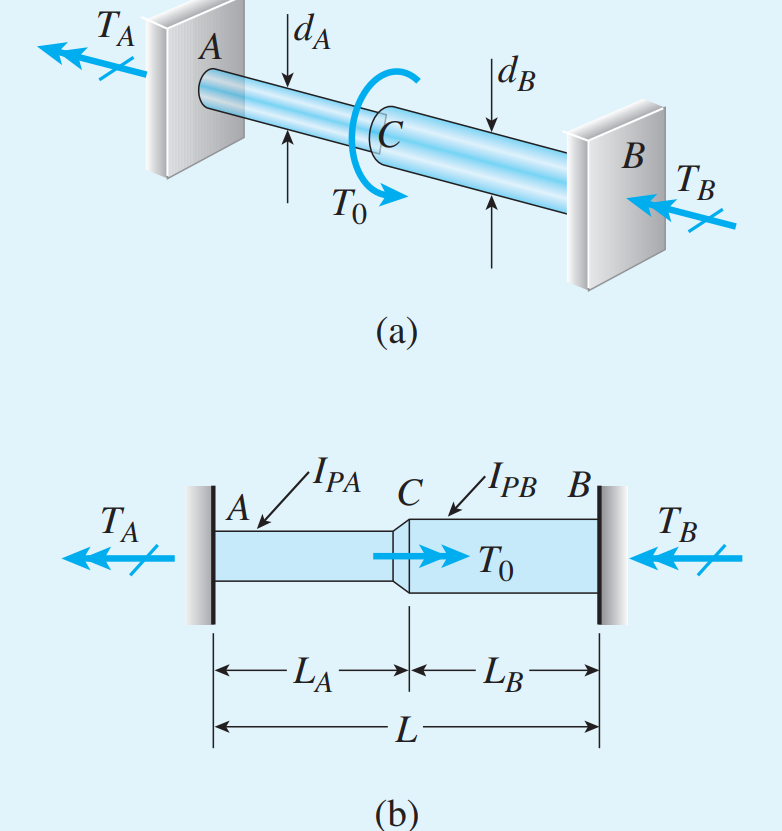

$Datos:$
- $d_A= 3 cm$
- $d_B= 5 cm$
- $L_A= 100 cm$
- $L_B= 80 cm$
- $T_0= 8000 kg\cdot cm$
- $G= 8\cdot 10^5 kg/cm^2$

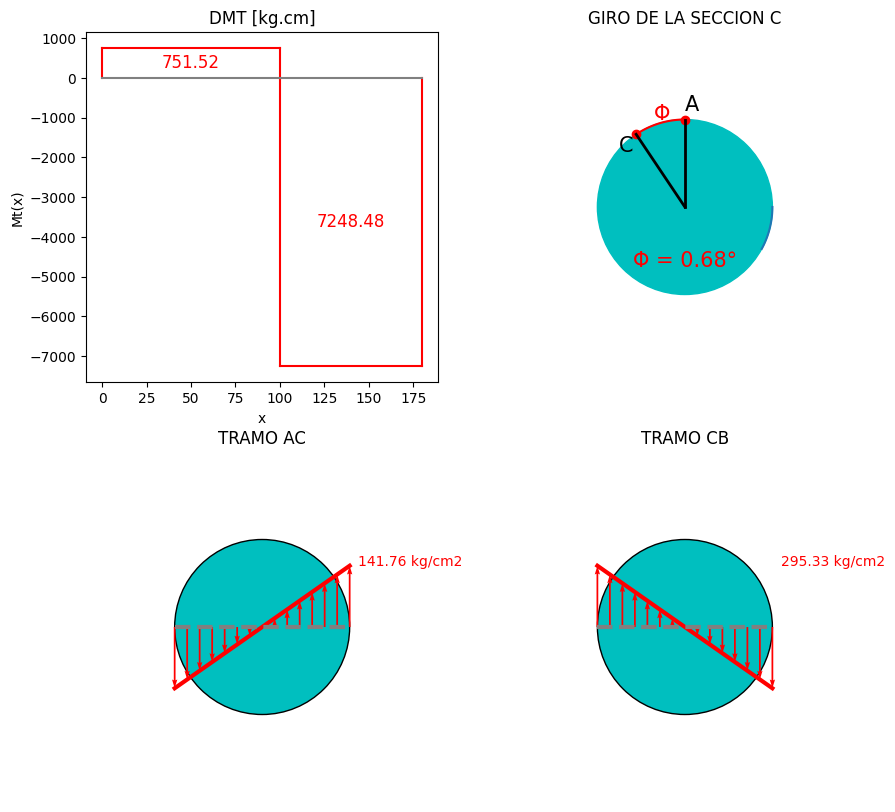

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Resolucion del ejercicio
#Datos
d_a = 3 #cm
d_b= 5 #cm
L_a = 100 #cm
L_b = 80 #cm
T_0 = 8000 #kgxcm
G = 8*10**5 #kg/cm2

#calculo de inercias polares de tramos AC y BC
Ip_a = np.pi*d_a**4/32 #inercia polar tramo AC
Ip_b = np.pi*d_b**4/32 #inercia polar tramo BC

#Ecuacion de compatibilidad φ A/B = 0 se aplica la ecuacion 2.17 (T_a.L_a)/(G*Ip_a)=(T_b.L_b)/(G*Ip_b)
#Ecuacion de la estatica T_a+T_b = T_0

T_a = T_0/(1+(L_a*Ip_b)/(L_b*Ip_a))
T_b = T_0 - T_a

#calculo de los esfuerzos cortantes maximos en cada tramo. ecuacion 2.15
t_ac = (T_a*d_a/2)/Ip_a
t_cb = (T_b*d_b/2)/Ip_b

#Calculo del angulo de rotacion en la seccion de T_0.  ecuacion 2.17
theta_c = T_a*L_a/(G*Ip_a)

#graficos
fig = plt.figure(figsize=(10, 10))
##Definir la disposición de subgráficos utilizando GridSpec
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1,1])

#diagrama de momento torsor
ax1 = plt.subplot(gs[0,0])
tramoAC = np.linspace(0,100,100)
Mt_AC = np.full_like(tramoAC,T_a)
tramoCB= np.linspace(100,180,100)
Mt_CB = np.full_like(tramoCB,-T_b)

##lineas verticales del diagrama
ax1.plot(np.full_like(Mt_AC,0),np.linspace(0,T_a,100), color = 'red')
ax1.plot(np.full_like(Mt_CB,L_a),np.linspace(T_a,-T_b,100), color = 'red')
ax1.plot(np.full_like(Mt_CB,L_b+L_a),np.linspace(0,-T_b,100), color = 'red')

#eje horizontal
ax1.plot(np.linspace(0,L_a+L_b,100),np.full_like(Mt_CB,0), color = 'grey')

#textos de valores
ax1.text(L_a/2,(T_a/2), f'{abs(round(T_a,2))}', color= 'red',fontsize=12, ha='center', va='center')
ax1.text(L_a+L_b/2,(-T_b/2), f'{abs(round(T_b,2))}', color= 'red',fontsize=12, ha='center', va='center')

#Tramos de valores de torsion
ax1.plot(tramoAC,Mt_AC, color="red")
ax1.plot(tramoCB,Mt_CB, color="red")
ax1.set_title('DMT [kg.cm]')
ax1.set_ylabel('Mt(x)')
ax1.set_xlabel('x')

#diagrama de esfuerzos cortantes
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])

for ax in [ax2,ax3]:
  circle1 = plt.Circle((0, 0), 1, facecolor='c',edgecolor='black', alpha=1)

  # Agregar el círculo al cuarto subgráfico (ax2)
  ax.add_patch(circle1)
  ax.set_aspect('equal')
  ax.set_ylim([-2, 2])
  ax.set_xlim([-2, 2])

  if ax == ax2:
    ax.plot(np.linspace(-1,1,20),np.linspace(-1,1,20)*0.7*abs(T_0)/T_0, color = 'red',linewidth=3)
  else :
    ax.plot(np.linspace(-1,1,20),np.linspace(-1,1,20)*-0.7*abs(T_0)/T_0, color = 'red',linewidth=3)
  ax.plot(np.linspace(-1,1,50),np.linspace(0,0,50), color = 'grey',linewidth=3,linestyle='--')
  for i in  np.linspace(-1,1,15)*0.7:
    if ax== ax2 :
      ax.quiver(i/0.7,0,0,i*abs(T_0)/T_0, angles='xy', scale_units='xy', scale=1, width = 0.005,color='red')
    else:
      ax.quiver(i/0.7,0,0,-i*abs(T_0)/T_0, angles='xy', scale_units='xy', scale=1, width = 0.005,color='red')
  ax.axis('off')
  if ax== ax2 :
    ax.text(1.1,0.7,f'{round(abs(t_ac),2)} kg/cm2', fontsize=10, color='red')
    ax.set_title('TRAMO AC')
  elif ax== ax3:
    ax.text(1.1,0.7,f'{round(abs(t_cb),2)} kg/cm2', fontsize=10, color='red')
    ax.set_title('TRAMO CB')

#grafica de theta_c relativo entre B y D
ax4 = plt.subplot(gs[0,1])

circle = plt.Circle((0, 0), 1, color='c', alpha=1)

# Agregar el círculo al cuarto subgráfico (ax2)
ax4.add_patch(circle)
ax4.set_aspect('equal')
ax4.set_ylim([-2, 2])
ax4.set_xlim([-2, 2])

def disT_a(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  z = p1[2] + (p2[2] - p1[2]) * t
  ax4.plot(x, y, z, color='black',linewidth=2)

def dist2(p1,p2):
  t = np.linspace(0, 1, 100)
  x = p1[0] + (p2[0] - p1[0]) * t
  y = p1[1] + (p2[1] - p1[1]) * t
  ax4.plot(x, y, color='black',linewidth=2)

def arco(a1,a2,h,k):
  angulos = np.linspace(a1,a2,100)
  x= np.cos(angulos)
  y=np.sin(angulos)
  ax4.plot(x,y, color = 'red')

#puntos q y q' de la seccion en grafico 2
ax4.scatter(0,1, color='red')
ax4.scatter(np.cos(np.pi/2+theta_c*50), np.sin(np.pi/2+theta_c*50), color='red')
ax4.text(0,1.1,'A', fontsize=15, color='black')
ax4.text(np.cos(np.pi/2+theta_c*50)-abs(theta_c)/theta_c*.2,+np.sin(np.pi/2+theta_c*50)-0.2,"C", fontsize=15, color='black')
#arco de cia en grafico 2
arco(np.pi/2,np.pi/2+theta_c*50,0,0)
ax4.text(-theta_c *30,1,'\u03A6', fontsize=15, color='r')
ax4.text(0,-0.5,f'\u03A6 = {round(theta_c*180/np.pi,2)}°', fontsize=15, color='r', va = 'top',ha = 'center')
#lineas y flechas en grafico 2
dist2([0,0],[np.cos(np.pi/2+theta_c*50),+np.sin(np.pi/2+theta_c*50)])
dist2([0,0],[0,1])


ax4.plot(np.cos(np.linspace(-np.cos(np.pi*60/180),0,50)),np.sin(np.linspace(-np.cos(np.pi*60/180),0,50)))
ax4.set_title("GIRO DE LA SECCION C")
ax4.axis('off')

plt.show()